In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
warnings.filterwarnings('ignore') 

In [5]:
train = pd.read_csv('UNSW_NB15_training-set.csv')
train.set_index('id',inplace = True)
train.head()

dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
id                                                                          
1   0.121478   tcp       -   FIN      6      4     258     172  74.087490   
2   0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
3   1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
4   1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
5   0.449454   tcp       -   FIN     10      6     534     268  33.373826   

    sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
id        ...                                                               
1    252  ...                 1               1             0           0   
2     62  ...                 1               2             0           0   
3     62  ...                 1               3             0           0   
4     62  ...                 1               3             1           1   
5    254  ...                 1              40             0           0   

    ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
id                                                                          
1                  0           1           1                0      Normal   
2                  0           1           6                0      Normal   
3                  0           2           6                0      Normal   
4                  0           2           1                0      Normal   
5                  0           2          39                0      Normal   

    label  
id         
1       0  
2       0  
3       0  
4       0  
5       0  

[5 rows x 44 columns]

In [6]:
test = pd.read_csv('UNSW_NB15_testing-set.csv')
test.set_index('id',inplace = True)
test.head()

dur proto service state  spkts  dpkts  sbytes  dbytes         rate  \
id                                                                            
1   0.000011   udp       -   INT      2      0     496       0   90909.0902   
2   0.000008   udp       -   INT      2      0    1762       0  125000.0003   
3   0.000005   udp       -   INT      2      0    1068       0  200000.0051   
4   0.000006   udp       -   INT      2      0     900       0  166666.6608   
5   0.000010   udp       -   INT      2      0    2126       0  100000.0025   

    sttl  ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
id        ...                                                               
1    254  ...                 1               2             0           0   
2    254  ...                 1               2             0           0   
3    254  ...                 1               3             0           0   
4    254  ...                 1               3             0           0   
5    254  ...                 1               3             0           0   

    ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
id                                                                          
1                  0           1           2                0      Normal   
2                  0           1           2                0      Normal   
3                  0           1           3                0      Normal   
4                  0           2           3                0      Normal   
5                  0           2           3                0      Normal   

    label  
id         
1       0  
2       0  
3       0  
4       0  
5       0  

[5 rows x 44 columns]

#### There are nine attack types discovered in UNSW-NB15 Dataset.

1. Generic: This attack act against a cryptographical system and it tries to break the key of the security system.
2. Exploit: the intrusions which utilize the software vulnerabilities, error or glitch within the operating systems(OS) or software.
3. Fuzzers: an attack in which the attacker tries to discover security loopholes in the Operating System, program or network and make these resources suspended for some time period and can even crash them.
4. DoS: an intrusion in which attacker tries to disrupt the computing resources, by making them extremely busy in order to prevent the authorized access to the resources.
5. Reconnaissance: It can be defined as a probe; an attack that gathers information about the target computer network in order to bypass its security control.
6. Analysis: a type intrusions that penetrate the web  applications through port scanning, malicious web scripting and dispatching spam emails etc.
7. Backdoor: a technique in which attacker can bypass the usual authentication and can get unauthorized remote access to a system.
8. Shellcode: a malware attack in which the attacker penetrates a slight piece of code starting from a shell to control the compromised machine.
9. Worms: malware that replicate themselves and spread to other computers by using the network to spread the attack, depending on the security failures on the target computer which it want to access.
10. Normal : No attack

Combining train and test dataset for better insights. 

In [7]:
train['Type'] = 'train'
test['Type'] = 'test'
df = pd.concat([train,test], sort = False, ignore_index = True)
df.head()

dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   sttl  ...  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  \
0   252  ...               1             0           0                 0   
1    62  ...               2             0           0                 0   
2    62  ...               3             0           0                 0   
3    62  ...               3             1           1                 0   
4   254  ...              40             0           0                 0   

   ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  label   Type  
0           1           1                0      Normal      0  train  
1           1           6                0      Normal      0  train  
2           2           6                0      Normal      0  train  
3           2           1                0      Normal      0  train  
4           2          39                0      Normal      0  train  

[5 rows x 45 columns]

In [8]:
df.is_ftp_login.value_counts()

0    254428
1      3219
4        16
2        10
Name: is_ftp_login, dtype: int64

In [9]:
# 2,4 have to be changed or deleted. 

In [10]:
df['attack_cat'].value_counts()

Normal            93000
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Name: attack_cat, dtype: int64

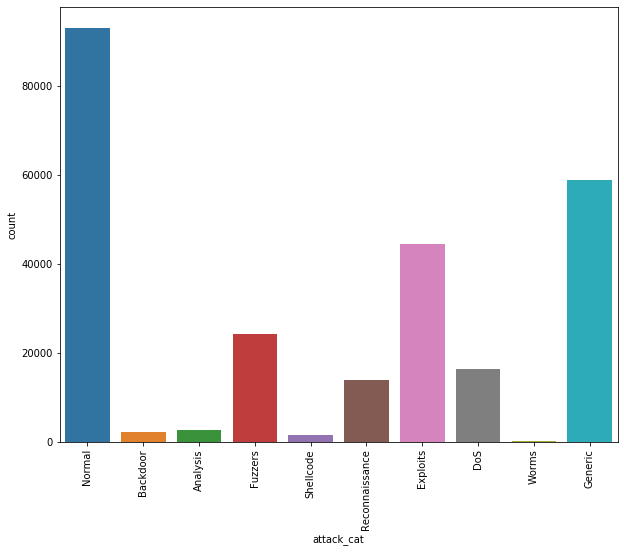

In [11]:
plt.figure(figsize = (10,8))
sns.countplot(df['attack_cat'])
plt.xticks(rotation  = 90)
plt.show()

### Per the records in the dataset, most common attack types are Generic, Exploits & Fuzzers.



- tcprtt is the sum of synack and ackdat. 


# Analysis of Continuous Variables

In [12]:
numerical = ['dur','rate','sload','dload','sinpkt','dinpkt','tcprtt','sjit', 'djit','synack', 'ackdat']

## Univariate Analysis

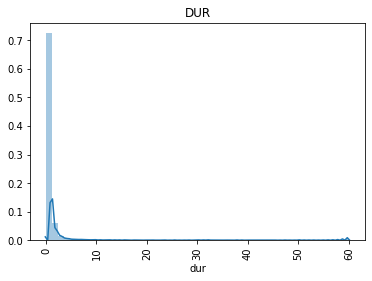

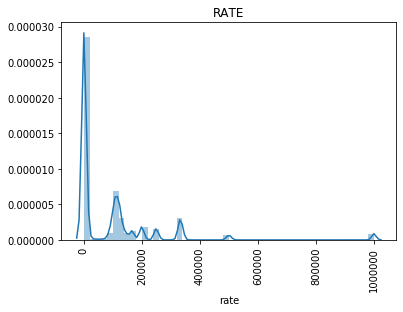

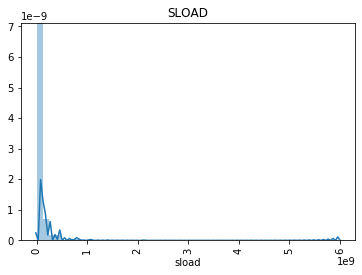

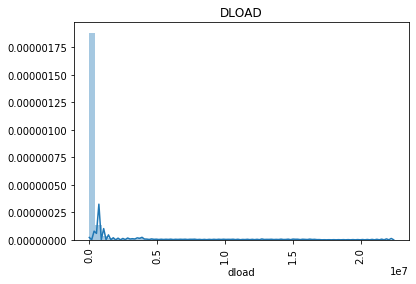

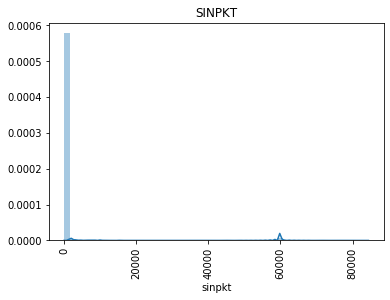

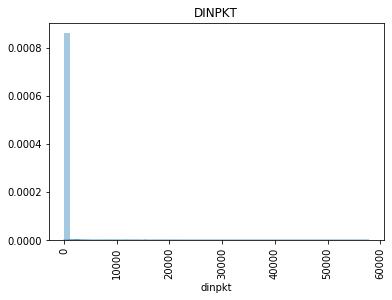

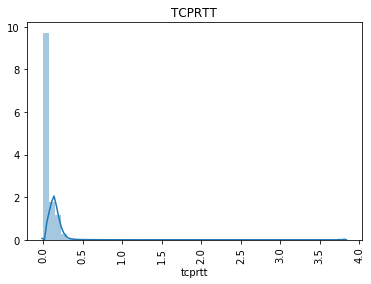

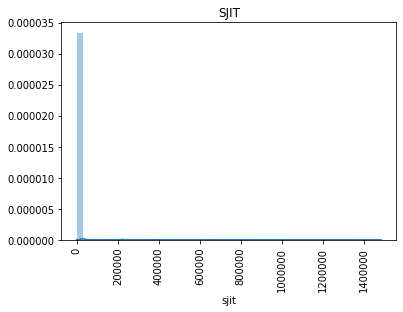

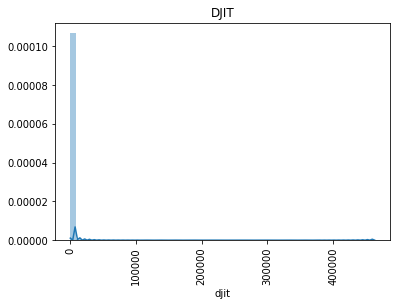

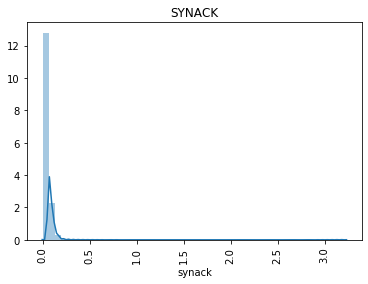

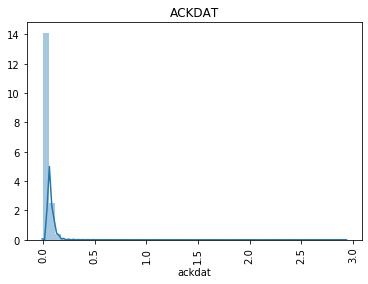

In [10]:
for i in numerical:
    sns.distplot(df[i])
    plt.xticks(rotation=90)
    plt.title(i.upper())
    plt.show()


#### Insights

- Most of the values are almost 0. 
- The data is right skewed and there are many outliers. 


## Bivariate Analysis

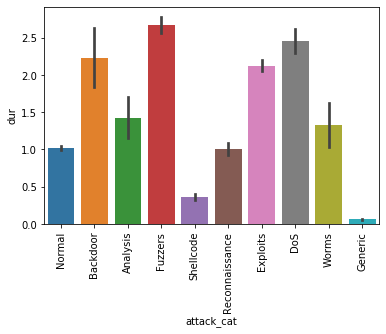

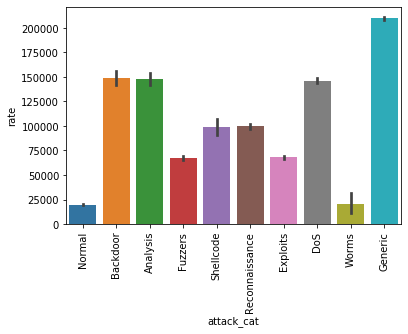

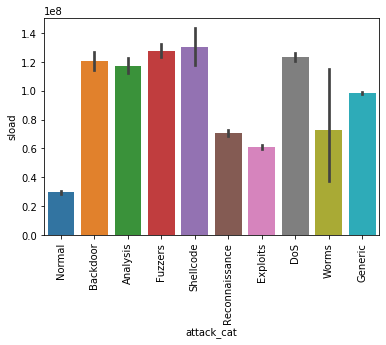

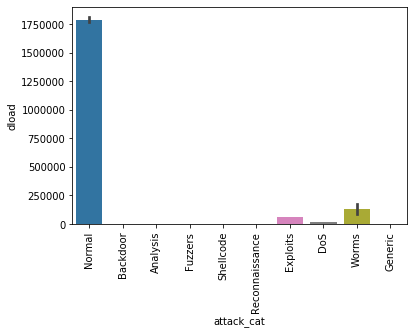

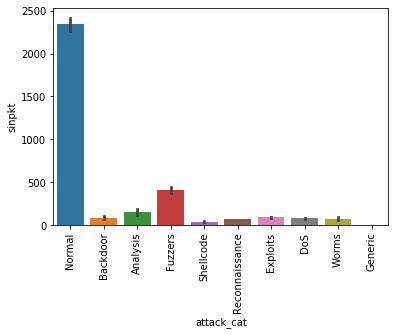

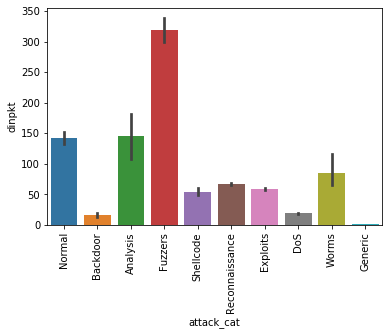

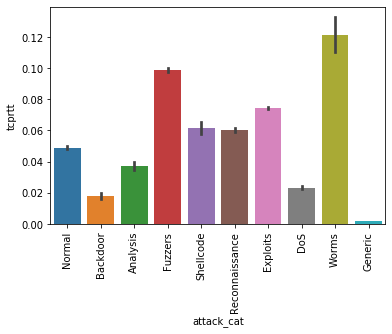

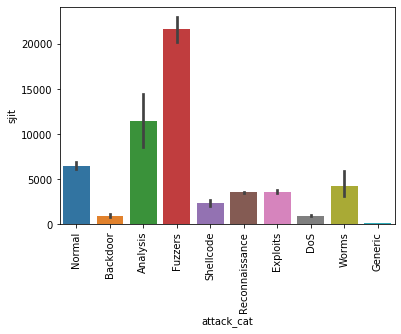

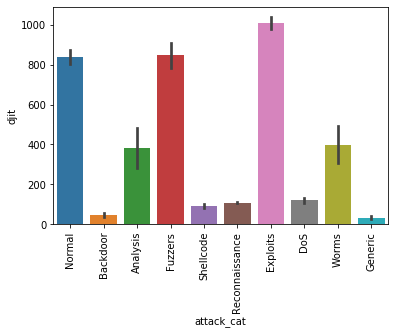

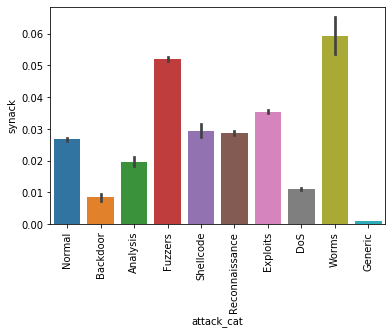

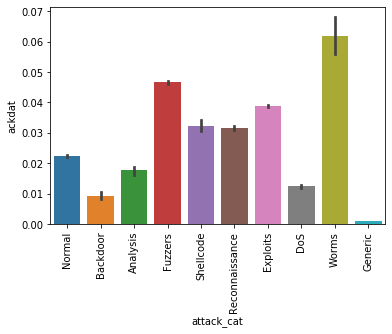

In [11]:
for i in numerical:
    sns.barplot(x = 'attack_cat', y=i, data=df)
    plt.xticks(rotation=90)
    plt.show()


#### Insights

- Generic attack has lowest duration whereas Fuzzers has the highest duration.  
- Mean number of bits transferred per second is lowest for 'normal' and 'Worms' and highest for 'Generic'.
- On an average destination bits per second is less than 250,000 for all the attack categories except for 'normal'. 
- Mean Source interpacket arrival time is less than 500 all attacks except for normal  for which value is 2800. 
- Mean Destiantion interpacket arrival time is highest for 'Fuzzer' whereas lowest for 'Generic'.
- Mean Source and Destination jitter time is lowest for 'Generic' , followed by 'Backdoor'.
- Mean TCP connection setup round-trip time is lowest for 'Generic' and highest for 'Worms'.



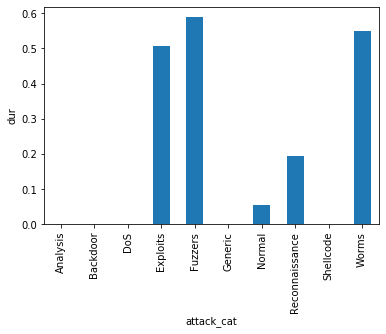

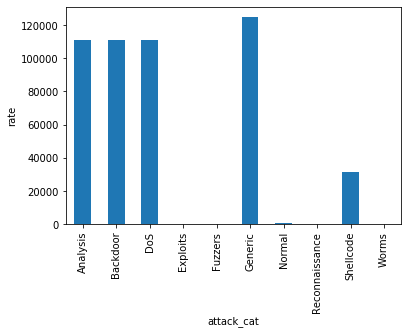

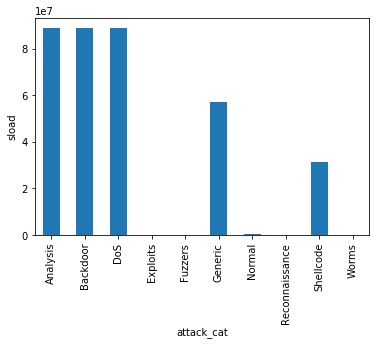

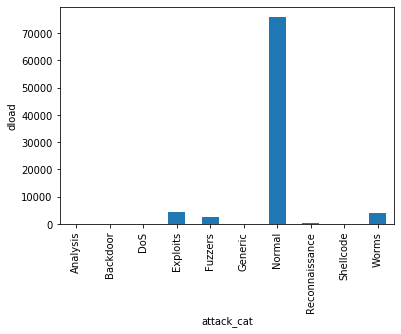

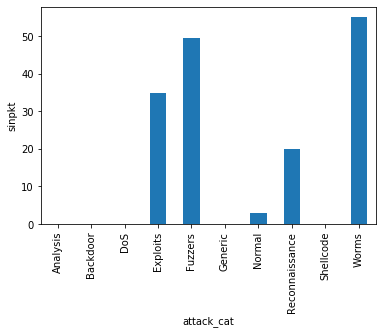

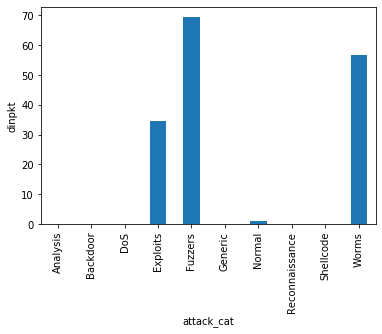

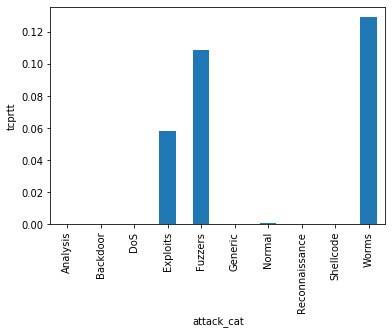

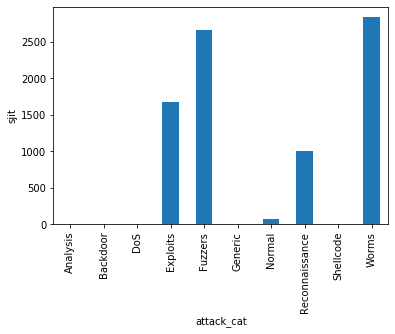

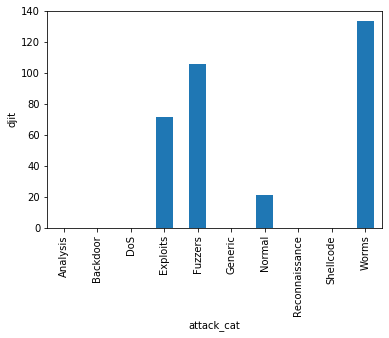

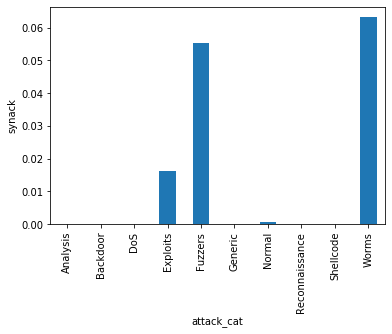

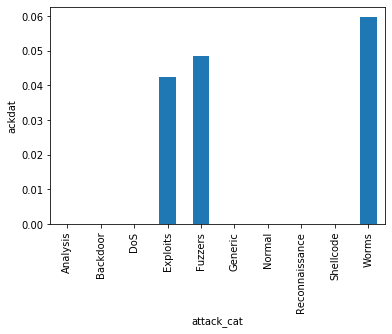

In [12]:
for i in numerical:
    df.groupby('attack_cat')[i].median().plot(kind='bar')
    plt.ylabel(i)
    plt.show()


#### Insights

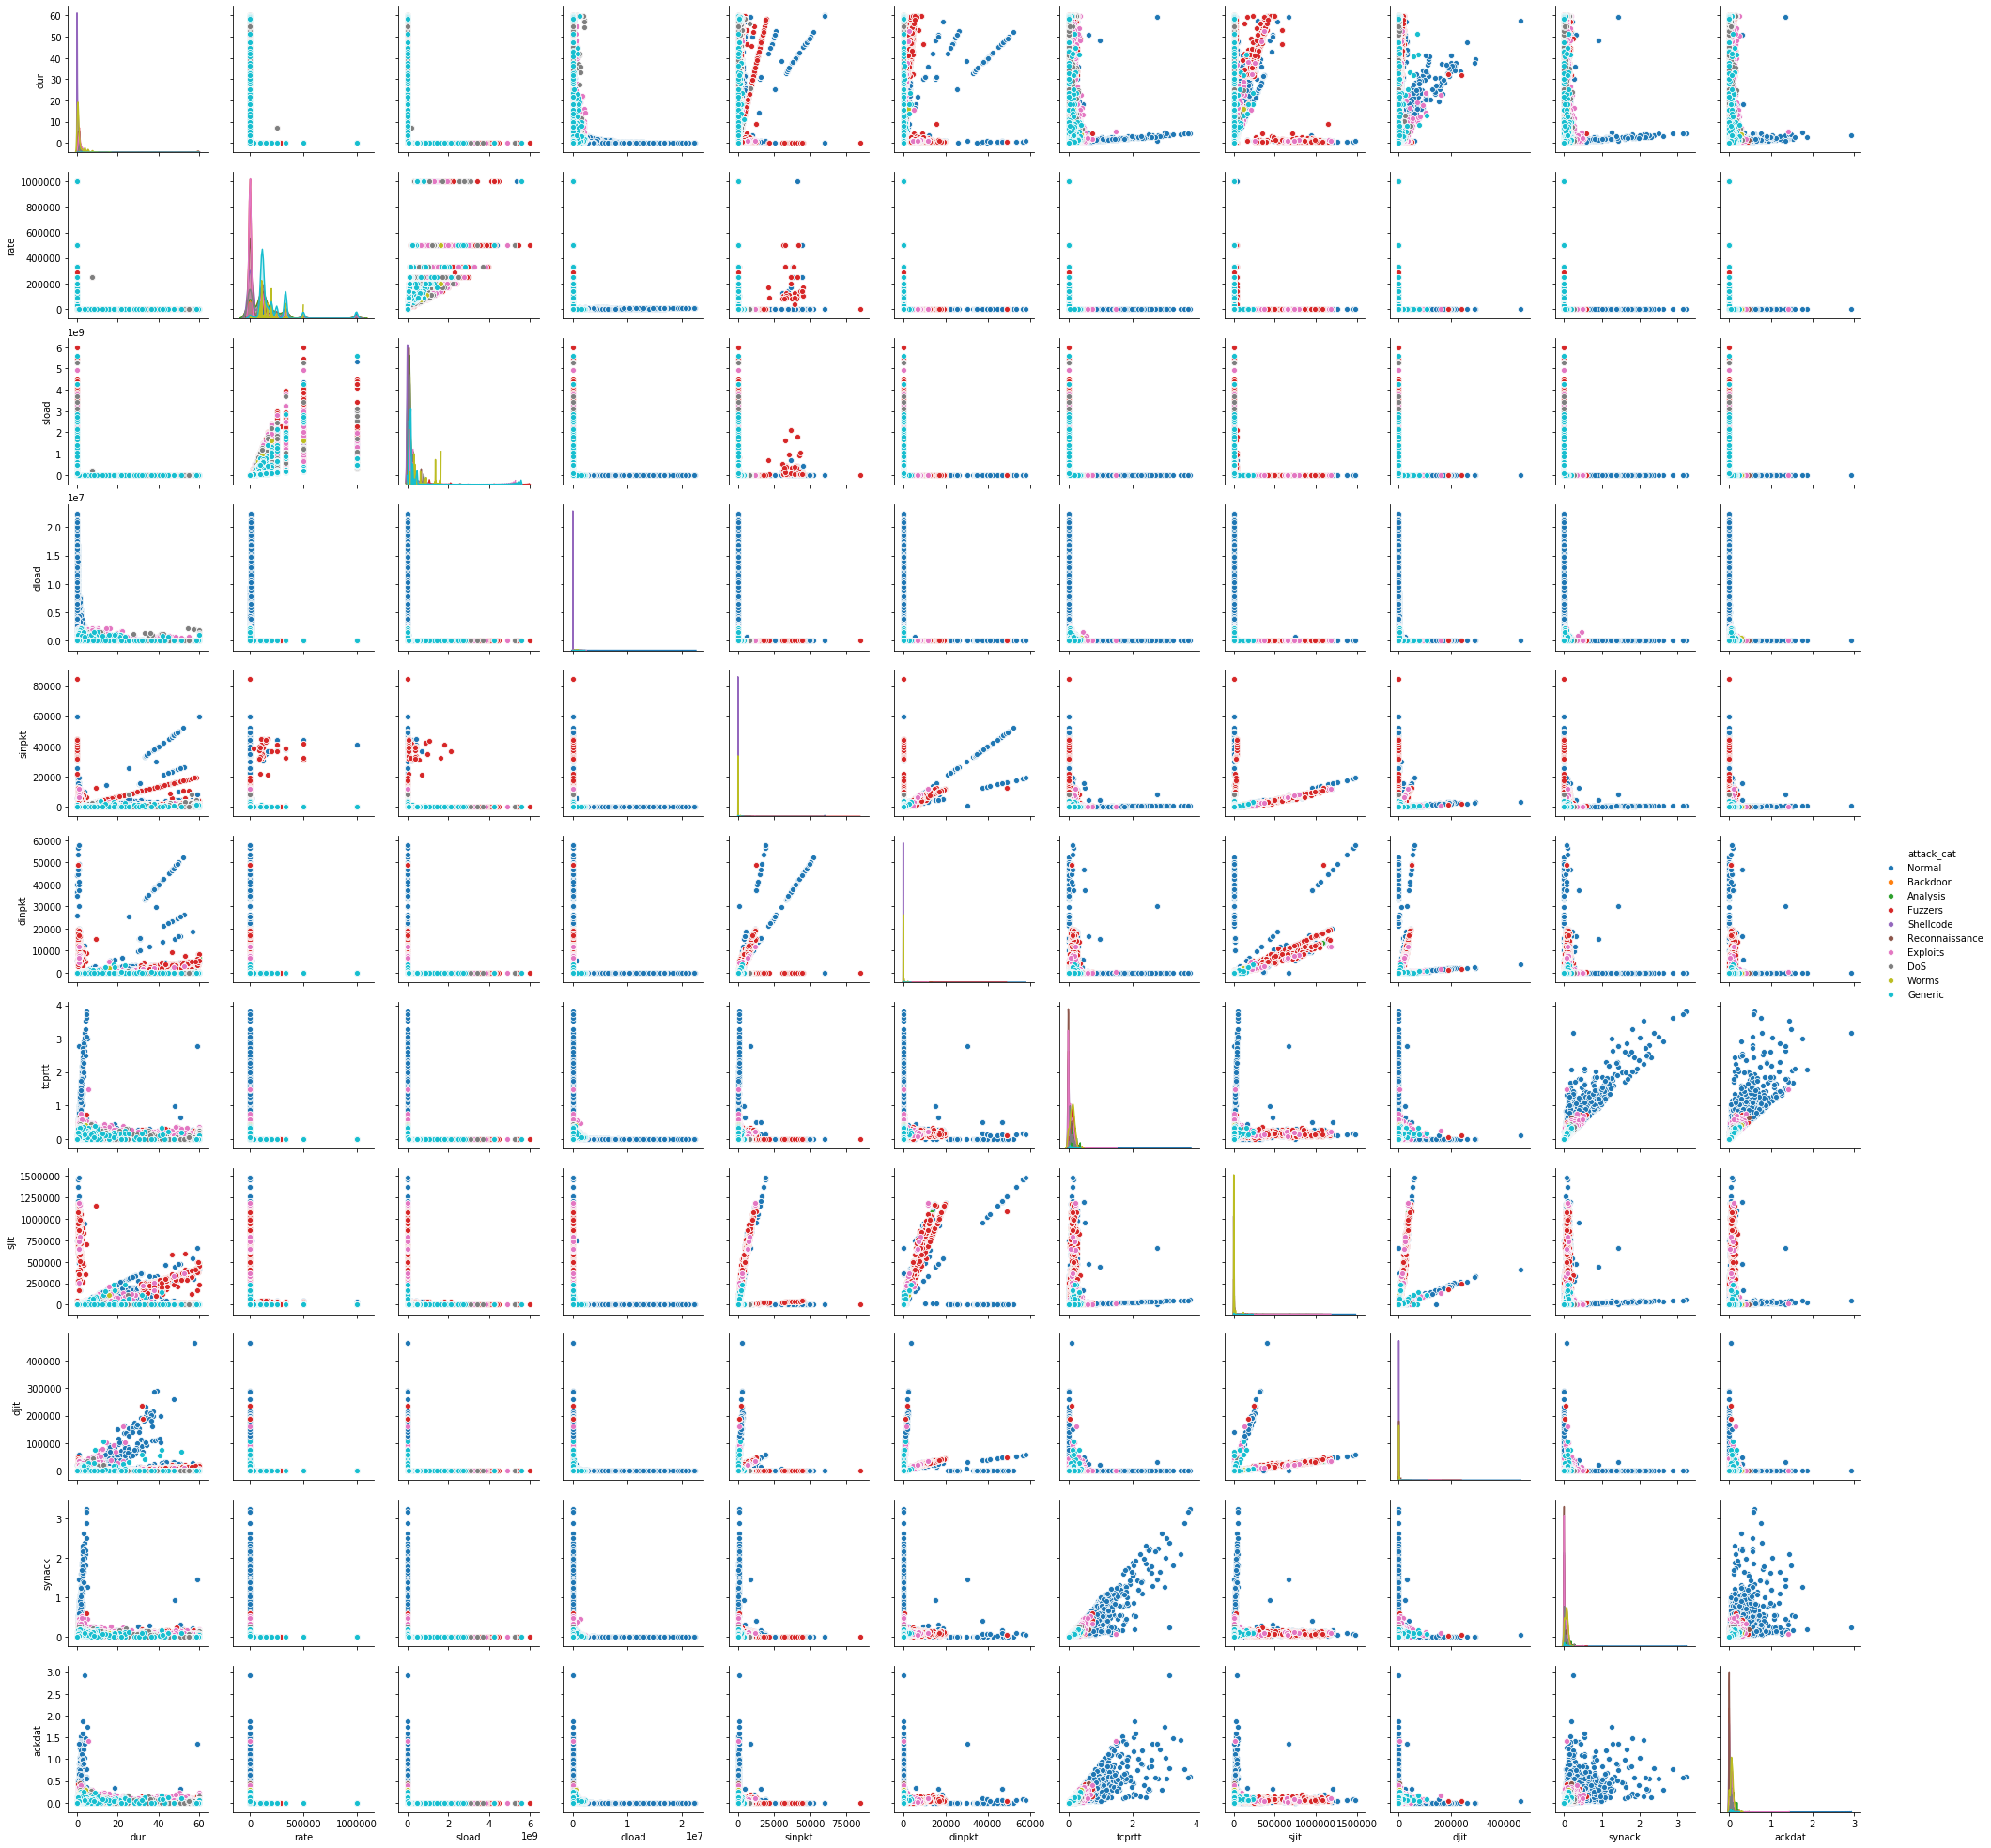

In [13]:
sns.pairplot(data = df, vars = numerical, diag_kind = 'kde', hue = 'attack_cat')

- in scatter plot, 4 clusters are separable. These attacks are normal, exploits, fuzzers and generic. 


## Statistical Tests - ANOVA

Hypothesis : 

- Null Hypothesis : Mean of the Features is equal for all the attack categories. 
- Alternative Hypothesis : Mean of the Features is not equal for all the attack categories. 

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("label~dur+rate+sload+dload+sinpkt+dinpkt+tcprtt + djit + sjit", data = df).fit()
table = sm.stats.anova_lm(model)
print(table)


                df        sum_sq      mean_sq             F         PR(>F)
dur            1.0     50.316045    50.316045    285.327732   5.612408e-64
rate           1.0   6941.380064  6941.380064  39362.557417   0.000000e+00
sload          1.0     89.604618    89.604618    508.121854  2.088941e-112
dload          1.0   5440.851872  5440.851872  30853.496309   0.000000e+00
sinpkt         1.0   1338.057227  1338.057227   7587.735283   0.000000e+00
dinpkt         1.0     15.689844    15.689844     88.972565   4.034812e-21
tcprtt         1.0      1.707466     1.707466      9.682546   1.860470e-03
djit           1.0     92.693348    92.693348    525.637151  3.287200e-116
sjit           1.0     26.385535    26.385535    149.624731   2.140627e-34
Residual  257663.0  45437.515469     0.176345           NaN            NaN


Since the pvalue < alpha(0.05), H0 is rejected. This implies that these features are significant. 
These features vary across the different attack categories. 

In [ ]:
## Target variable =  attack_Cat

In [68]:
newdf = pd.get_dummies(df,columns=['attack_cat'],drop_first=False)

In [60]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("attack_cat_Analysis~dur+rate+sload+dload+sinpkt+dinpkt+tcprtt + djit + sjit", data = newdf).fit()
table = sm.stats.anova_lm(model)
print(table)

                df       sum_sq   mean_sq           F        PR(>F)
dur            1.0     0.022579  0.022579    2.201358  1.378905e-01
rate           1.0     3.576777  3.576777  348.716409  9.081327e-78
sload          1.0     0.090043  0.090043    8.778696  3.047968e-03
dload          1.0     1.304961  1.304961  127.226609  1.683915e-29
sinpkt         1.0     0.271107  0.271107   26.431500  2.732501e-07
dinpkt         1.0     0.086304  0.086304    8.414199  3.723333e-03
tcprtt         1.0     0.060795  0.060795    5.927201  1.490958e-02
djit           1.0     0.103788  0.103788   10.118732  1.467873e-03
sjit           1.0     0.827528  0.827528   80.679452  2.671914e-19
Residual  257663.0  2642.844399  0.010257         NaN           NaN


In [61]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("attack_cat_Backdoor~dur+rate+sload+dload+sinpkt+dinpkt+tcprtt + djit + sjit", data = newdf).fit()
table = sm.stats.anova_lm(model)
print(table)

                df       sum_sq   mean_sq           F        PR(>F)
dur            1.0     0.563943  0.563943   63.146236  1.926832e-15
rate           1.0     3.097156  3.097156  346.797165  2.374302e-77
sload          1.0     0.107069  0.107069   11.988763  5.353099e-04
dload          1.0     0.890484  0.890484   99.709933  1.781782e-23
sinpkt         1.0     0.289519  0.289519   32.418203  1.244510e-08
dinpkt         1.0     0.140446  0.140446   15.726074  7.322779e-05
tcprtt         1.0     1.423916  1.423916  159.439786  1.537769e-36
djit           1.0     0.312844  0.312844   35.030055  3.250639e-09
sjit           1.0     0.001671  0.001671    0.187084  6.653547e-01
Residual  257663.0  2301.122083  0.008931         NaN           NaN


In [62]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("attack_cat_DoS~dur+rate+sload+dload+sinpkt+dinpkt+tcprtt + djit + sjit", data = newdf).fit()
table = sm.stats.anova_lm(model)
print(table)

                df        sum_sq     mean_sq            F         PR(>F)
dur            1.0     42.016450   42.016450   721.613621  9.894682e-159
rate           1.0    141.262536  141.262536  2426.120500   0.000000e+00
sload          1.0     11.482903   11.482903   197.213692   8.799007e-45
dload          1.0     41.258810   41.258810   708.601498  6.562324e-156
sinpkt         1.0     15.421304   15.421304   264.853958   1.607930e-59
dinpkt         1.0      7.335020    7.335020   125.975674   3.161811e-29
tcprtt         1.0     41.439786   41.439786   711.709676  1.390066e-156
djit           1.0     12.306023   12.306023   211.350405   7.281822e-48
sjit           1.0      0.042247    0.042247     0.725581   3.943202e-01
Residual  257663.0  15002.605544    0.058226          NaN            NaN


In [63]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("attack_cat_Exploits~dur+rate+sload+dload+sinpkt+dinpkt+tcprtt + djit + sjit", data = newdf).fit()
table = sm.stats.anova_lm(model)
print(table)

                df        sum_sq     mean_sq            F         PR(>F)
dur            1.0    165.485166  165.485166  1208.656825  3.300683e-264
rate           1.0    127.574931  127.574931   931.771196  2.825008e-204
sload          1.0     15.014435   15.014435   109.661181   1.176453e-25
dload          1.0    535.950631  535.950631  3914.431741   0.000000e+00
sinpkt         1.0    174.803226  174.803226  1276.713298  6.301465e-279
dinpkt         1.0     23.807885   23.807885   173.886056   1.079814e-39
tcprtt         1.0    376.852915  376.852915  2752.427045   0.000000e+00
djit           1.0     60.513205   60.513205   441.971322   4.875306e-98
sjit           1.0     72.893823   72.893823   532.395857  1.120574e-117
Residual  257663.0  35278.338333    0.136917          NaN            NaN


In [64]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("attack_cat_Fuzzers~dur+rate+sload+dload+sinpkt+dinpkt+tcprtt + djit + sjit", data = newdf).fit()
table = sm.stats.anova_lm(model)
print(table)

                df        sum_sq     mean_sq            F         PR(>F)
dur            1.0    130.203140  130.203140  1654.089007   0.000000e+00
rate           1.0     33.992178   33.992178   431.833583   7.774370e-96
sload          1.0    550.119906  550.119906  6988.673941   0.000000e+00
dload          1.0    170.058869  170.058869  2160.412618   0.000000e+00
sinpkt         1.0     27.436265   27.436265   348.547852   9.881109e-78
dinpkt         1.0     65.721431   65.721431   834.919171  2.716518e-183
tcprtt         1.0    565.736566  565.736566  7187.066593   0.000000e+00
djit           1.0      6.422421    6.422421    81.589854   1.685832e-19
sjit           1.0    132.677124  132.677124  1685.518279   0.000000e+00
Residual  257663.0  20282.180353    0.078716          NaN            NaN


In [65]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("attack_cat_Generic~dur+rate+sload+dload+sinpkt+dinpkt+tcprtt + djit + sjit", data = newdf).fit()
table = sm.stats.anova_lm(model)
print(table)

                df        sum_sq      mean_sq             F         PR(>F)
dur            1.0    529.671434   529.671434   3989.168527   0.000000e+00
rate           1.0   6993.610555  6993.610555  52671.692938   0.000000e+00
sload          1.0   1673.667908  1673.667908  12605.065930   0.000000e+00
dload          1.0    428.406544   428.406544   3226.501929   0.000000e+00
sinpkt         1.0     84.472585    84.472585    636.196998  3.325430e-140
dinpkt         1.0     15.294879    15.294879    115.191881   7.238102e-27
tcprtt         1.0   1438.301413  1438.301413  10832.426223   0.000000e+00
djit           1.0     43.752879    43.752879    329.520521   1.358976e-73
sjit           1.0      1.637926     1.637926     12.335882   4.444101e-04
Residual  257663.0  34211.823767     0.132777           NaN            NaN


In [66]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("attack_cat_Reconnaissance~dur+rate+sload+dload+sinpkt+dinpkt+tcprtt + djit + sjit", data = newdf).fit()
table = sm.stats.anova_lm(model)
print(table)

                df        sum_sq    mean_sq            F         PR(>F)
dur            1.0      1.242366   1.242366    24.375327   7.932699e-07
rate           1.0      1.773745   1.773745    34.801026   3.656347e-09
sload          1.0      1.185669   1.185669    23.262934   1.413775e-06
dload          1.0     55.654163  55.654163  1091.939307  5.926001e-239
sinpkt         1.0     12.401187  12.401187   243.312326   7.899972e-55
dinpkt         1.0      0.199264   0.199264     3.909584   4.801255e-02
tcprtt         1.0     10.428321  10.428321   204.604531   2.152180e-46
djit           1.0     12.215687  12.215687   239.672790   4.902796e-54
sjit           1.0      0.042597   0.042597     0.835765   3.606117e-01
Residual  257663.0  13132.614980   0.050968          NaN            NaN


In [67]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("attack_cat_Shellcode~dur+rate+sload+dload+sinpkt+dinpkt+tcprtt + djit + sjit", data = newdf).fit()
table = sm.stats.anova_lm(model)
print(table)

                df       sum_sq   mean_sq           F        PR(>F)
dur            1.0     0.193934  0.193934   33.320189  7.825614e-09
rate           1.0     0.009012  0.009012    1.548457  2.133645e-01
sload          1.0     1.153768  1.153768  198.231406  5.278415e-45
dload          1.0     0.650343  0.650343  111.736934  4.130708e-26
sinpkt         1.0     0.134265  0.134265   23.068412  1.564258e-06
dinpkt         1.0     0.001231  0.001231    0.211536  6.455667e-01
tcprtt         1.0     0.201242  0.201242   34.575804  4.104737e-09
djit           1.0     0.115404  0.115404   19.827806  8.477647e-06
sjit           1.0     0.002603  0.002603    0.447308  5.036167e-01
Residual  257663.0  1499.677661  0.005820         NaN           NaN


In [69]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("attack_cat_Worms~dur+rate+sload+dload+sinpkt+dinpkt+tcprtt + djit + sjit", data = newdf).fit()
table = sm.stats.anova_lm(model)
print(table)

                df      sum_sq   mean_sq          F        PR(>F)
dur            1.0    0.000025  0.000025   0.036597  8.482877e-01
rate           1.0    0.022781  0.022781  33.777456  6.186321e-09
sload          1.0    0.012963  0.012963  19.220076  1.165279e-05
dload          1.0    0.009401  0.009401  13.939559  1.888239e-04
sinpkt         1.0    0.003090  0.003090   4.581404  3.232166e-02
dinpkt         1.0    0.000048  0.000048   0.071192  7.896089e-01
tcprtt         1.0    0.054316  0.054316  80.534440  2.875299e-19
djit           1.0    0.001131  0.001131   1.676943  1.953323e-01
sjit           1.0    0.000590  0.000590   0.874357  3.497527e-01
Residual  257663.0  173.778158  0.000674        NaN           NaN


# Categorical 

In [15]:
# Chisquare test for independence

In [2]:
categorical = ['state','service','sttl','dttl','swin','dwin','trans_depth','ct_srv_src',
'ct_state_ttl','ct_dst_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','is_ftp_login',
'ct_ftp_cmd','ct_flw_http_mthd','ct_src_ltm','ct_srv_dst','is_sm_ips_ports']

In [17]:
## Replace - with none in service column

In [18]:
df.service.replace(to_replace='-',value='Not used',inplace = True)

In [45]:
def testing(feature): 
    table = pd.crosstab(feature, df.attack_cat)
    teststats, Pvalue, dof, array = stats.chi2_contingency(table)
    print('Feature name:', i)
    print(" Pvalue", Pvalue)
    
    if(Pvalue < 0.05):
        print("Reject the null hypothesis meaning attack category is dependent on",i,"feature")

    else:
        print("We fail to reject null hypothesis meaning, attack category is independent of",i,"feature")
    print()
   

In [44]:
for i in categorical:
    testing(df[i])

Feature name: state
 Pvalue 0.0
Reject the null hypothesis meaning attack category is dependent on state feature

Feature name: service
 Pvalue 0.0
Reject the null hypothesis meaning attack category is dependent on service feature

Feature name: sttl
 Pvalue 0.0
Reject the null hypothesis meaning attack category is dependent on sttl feature

Feature name: dttl
 Pvalue 0.0
Reject the null hypothesis meaning attack category is dependent on dttl feature

Feature name: swin
 Pvalue 0.0
Reject the null hypothesis meaning attack category is dependent on swin feature

Feature name: dwin
 Pvalue 0.0
Reject the null hypothesis meaning attack category is dependent on dwin feature

Feature name: trans_depth
 Pvalue 0.0
Reject the null hypothesis meaning attack category is dependent on trans_depth feature

Feature name: ct_srv_src
 Pvalue 0.0
Reject the null hypothesis meaning attack category is dependent on ct_srv_src feature

Feature name: ct_state_ttl
 Pvalue 0.0
Reject the null hypothesis mean

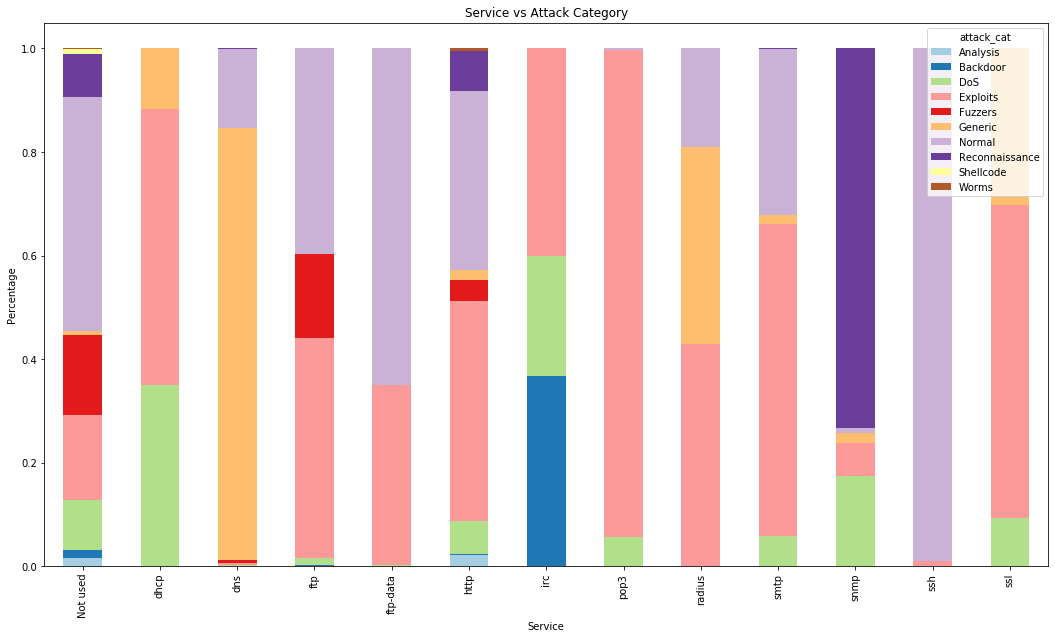

In [21]:
# SERVICE VS TARGET VARIABLE
SERVICE = pd.crosstab(df.service, df.attack_cat)
SERVICE.div(SERVICE.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,colormap = 'Paired', figsize = (18,10))
plt.xlabel('Service')
plt.ylabel('Percentage')
plt.title('Service vs Attack Category')
plt.xticks(rotation = 90)
plt.show()



In [22]:
## Univariate Analysis

In [ ]:
## we have been trying this code for subplots however we are not able to get the desired output.  

In [19]:
df['state'].value_counts()

FIN    117164
INT    116438
CON     20134
REQ      3833
RST        84
ECO        12
ACC         4
no          1
PAR         1
CLO         1
URN         1
Name: state, dtype: int64

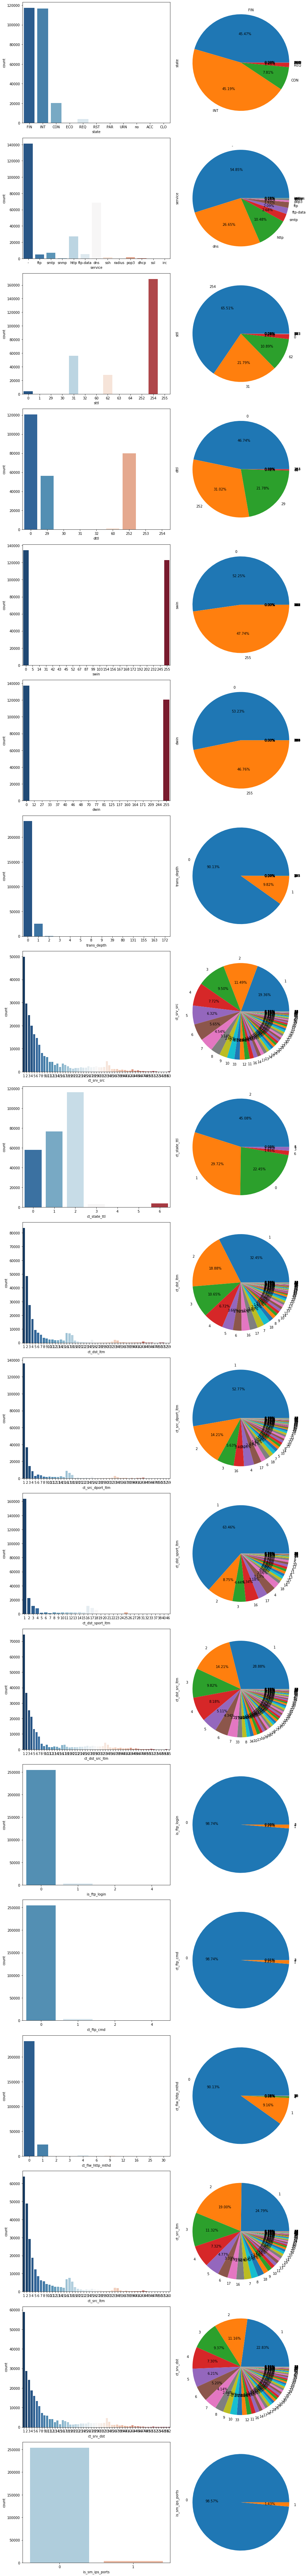

In [30]:
fig, axes = plt.subplots(19,2, figsize = (13,105))

for i,e in zip(categorical,range(19)):
    sns.countplot(df[i], palette='RdBu_r',ax=axes[e][0])
    df[i].value_counts().plot(kind="pie",autopct="%1.2F%%",ax=axes[e][1])
    
plt.tight_layout()
plt.show()

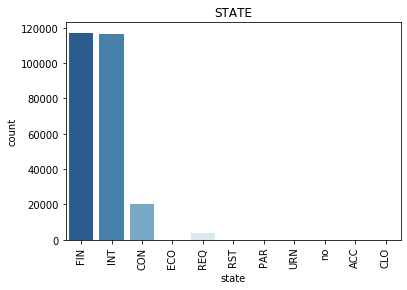

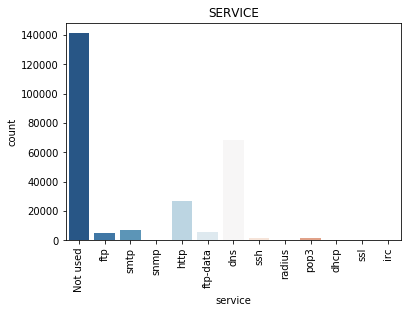

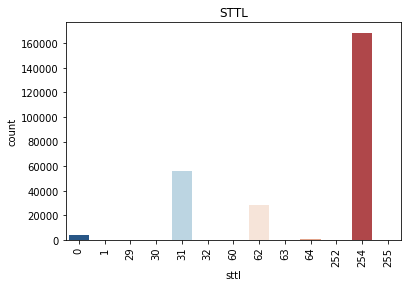

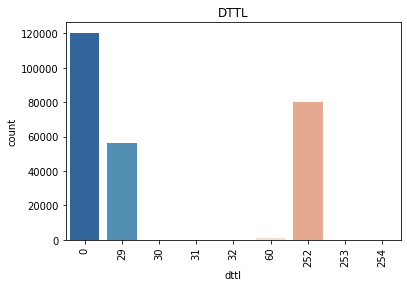

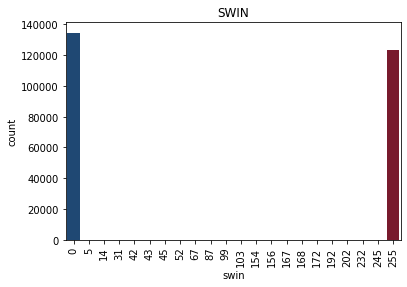

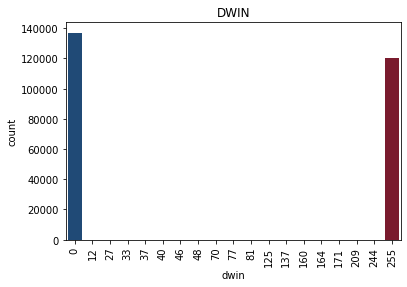

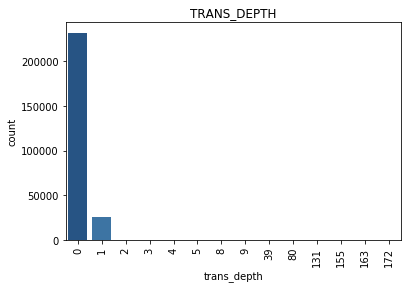

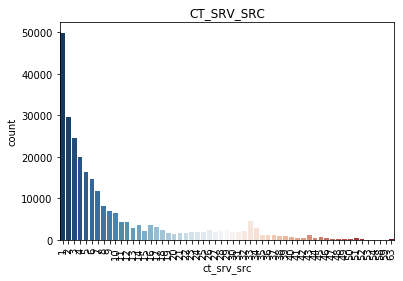

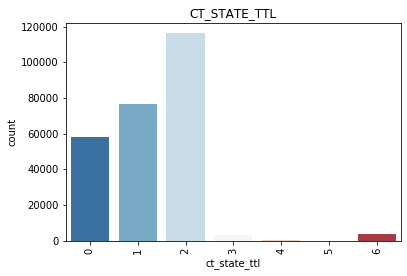

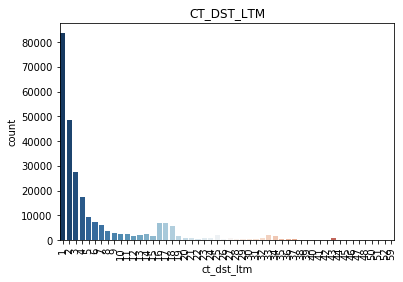

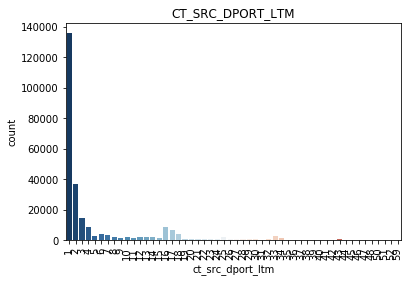

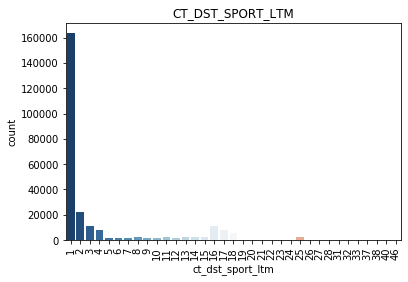

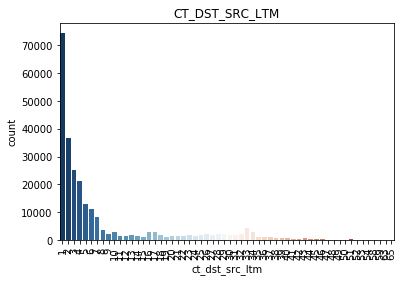

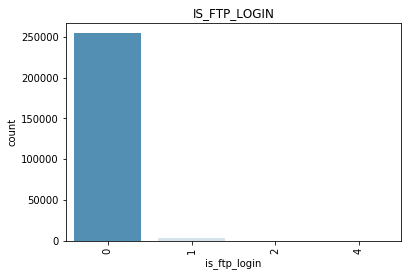

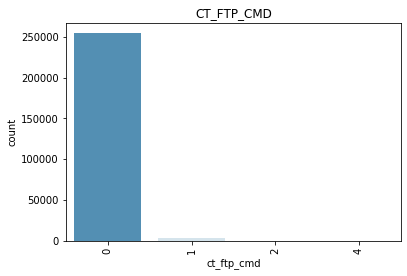

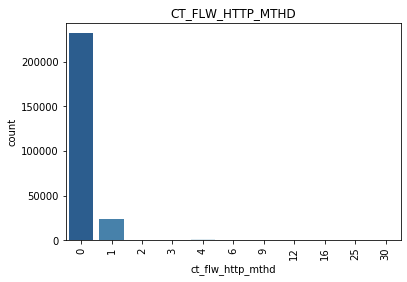

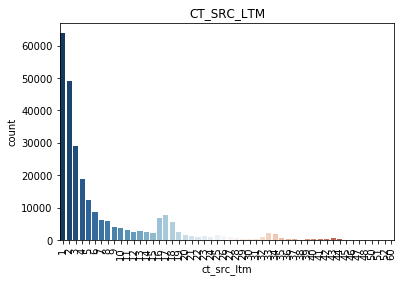

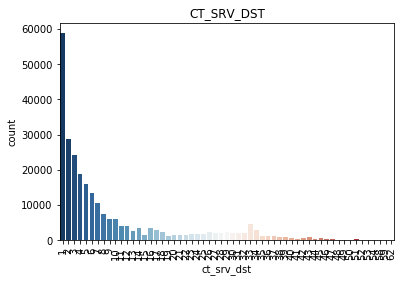

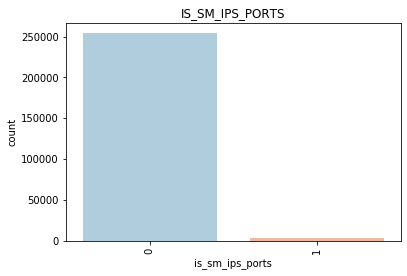

In [25]:
for i in categorical:
    sns.countplot(df[i], palette='RdBu_r')
    plt.xticks(rotation=90)
    plt.title(i.upper())
    plt.show()

#### Insights

- In most of the transactions service has not been used.  
- Most of the FTP sessions has been accessed without user and password. 

## Insights:




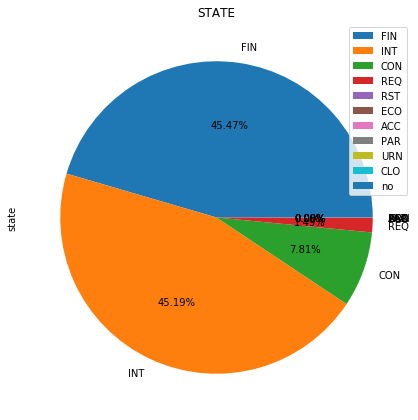

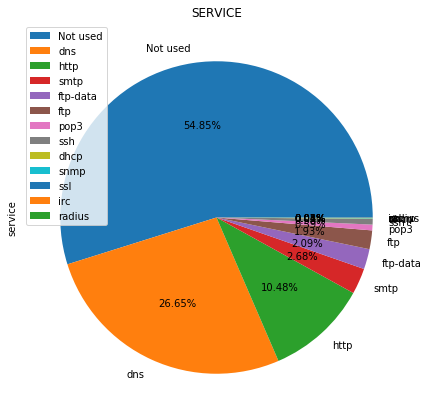

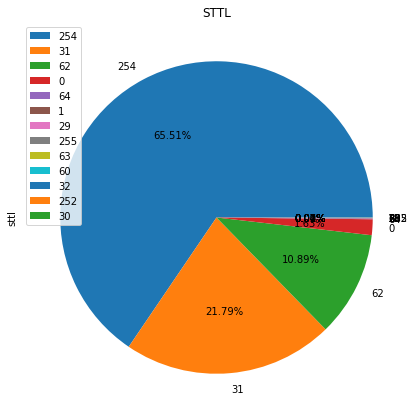

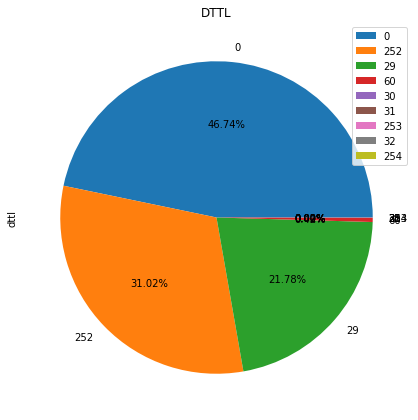

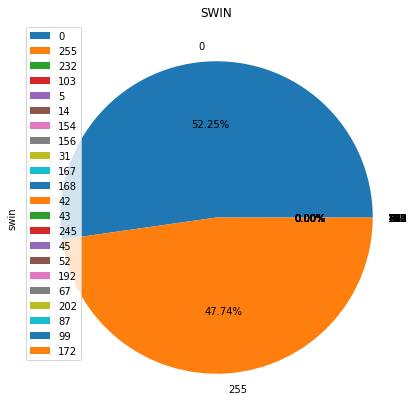

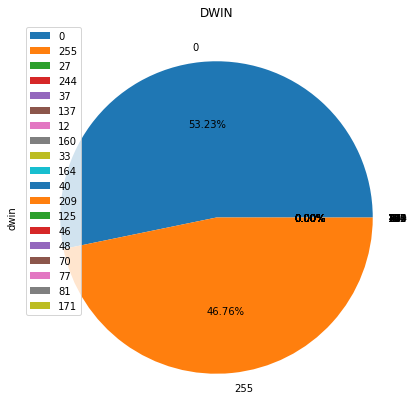

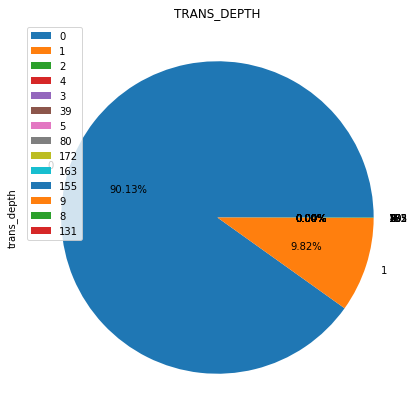

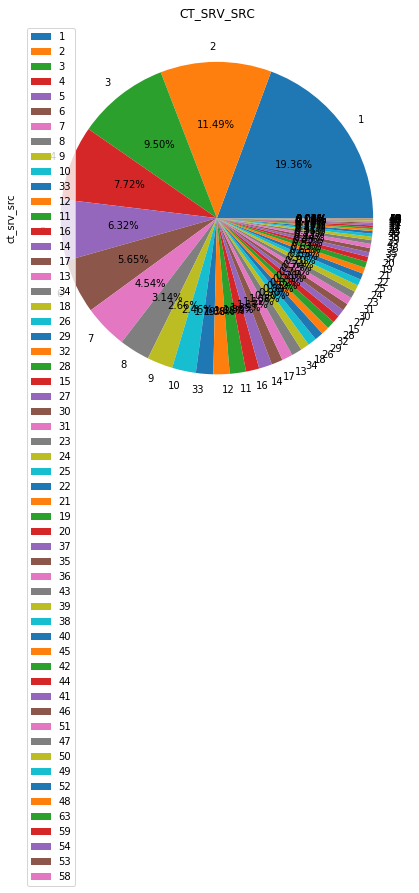

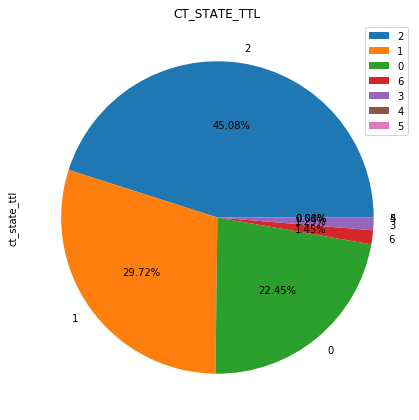

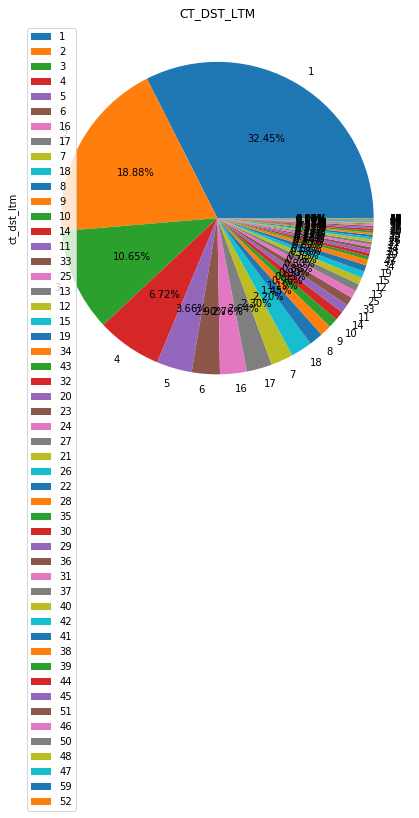

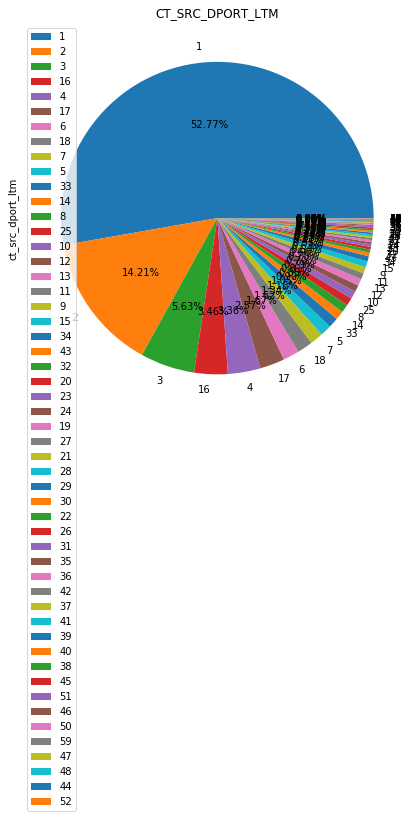

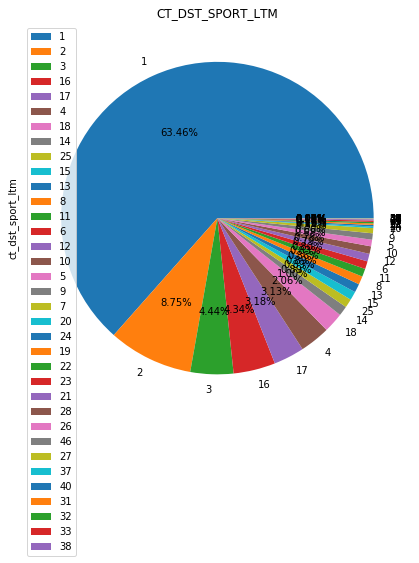

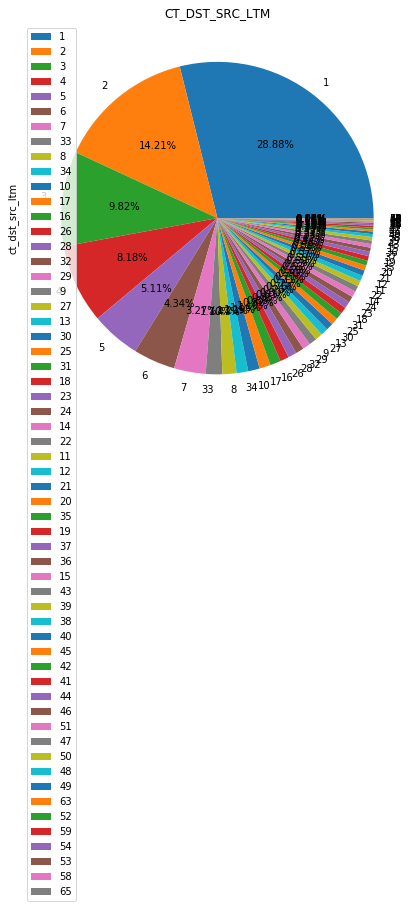

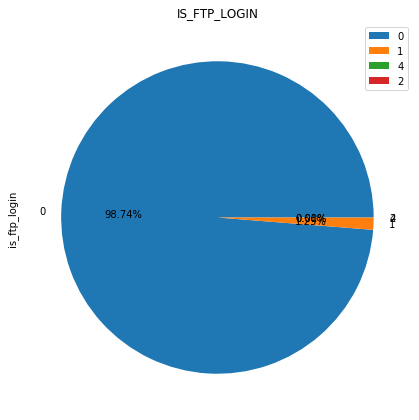

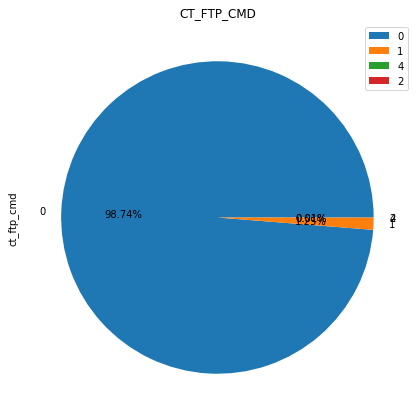

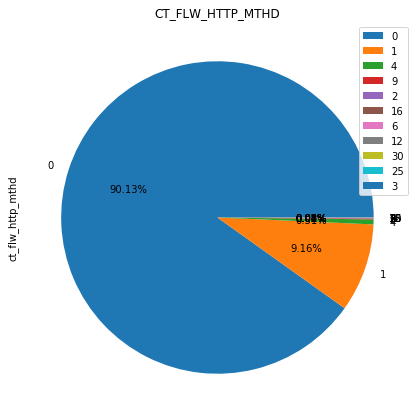

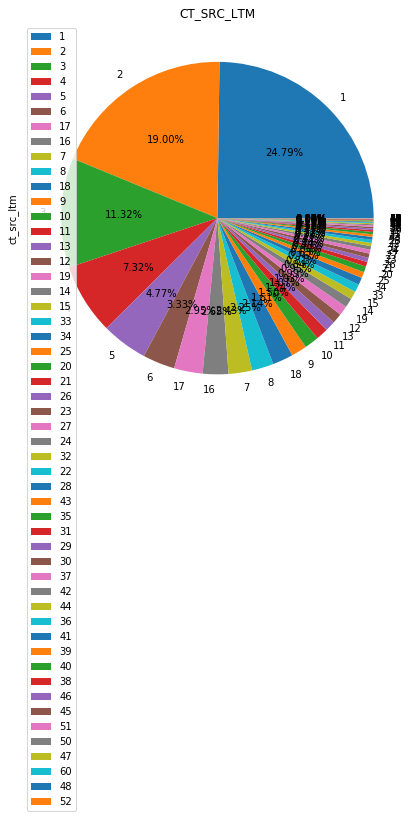

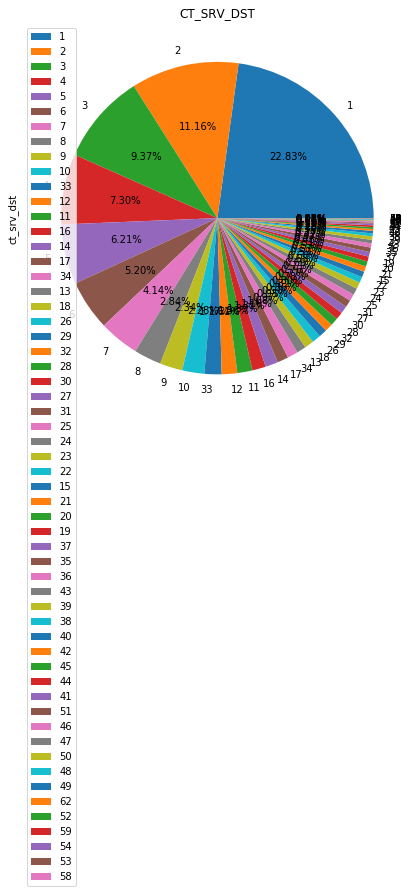

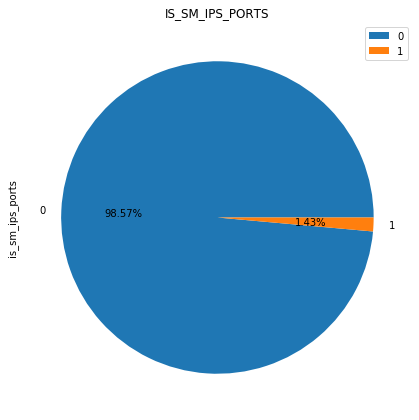

In [26]:
for i in categorical:
    plt.figure(figsize=(7,9))
    df[i].value_counts().plot(kind="pie",autopct="%1.2F%%")
    plt.title(i.upper())
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
## Insights:


### Bivariate Analysis

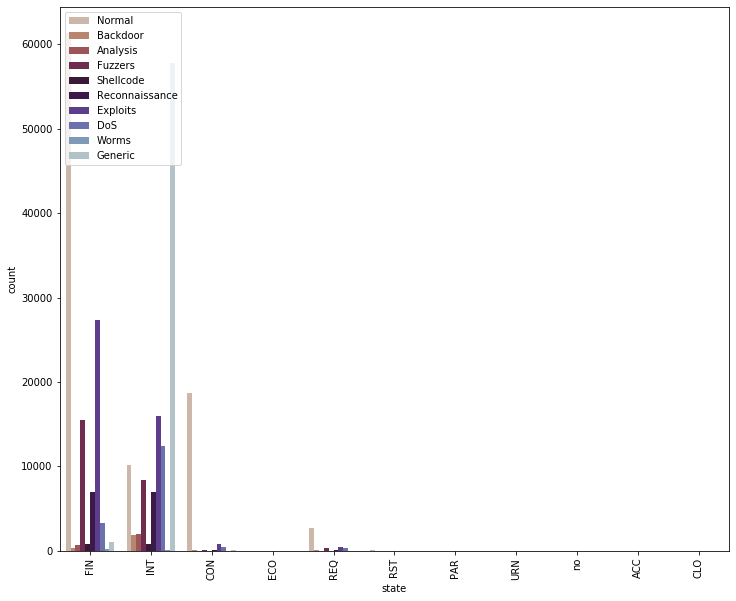

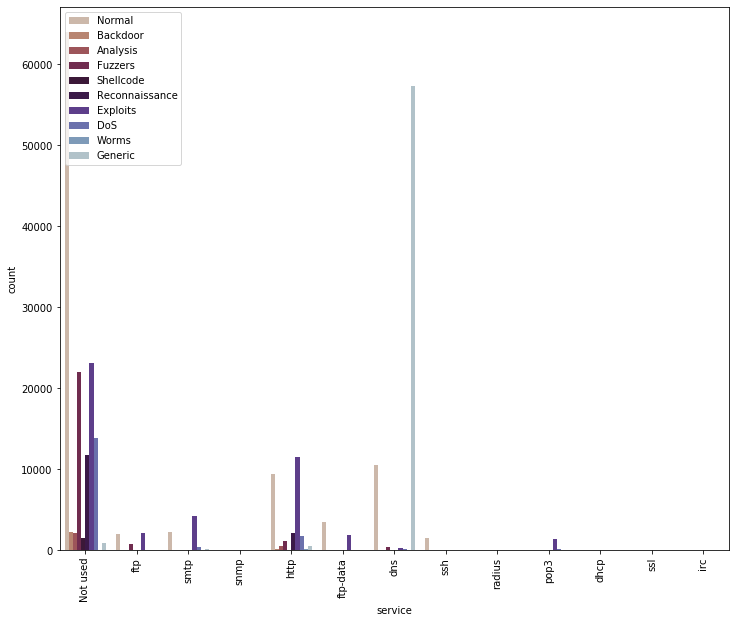

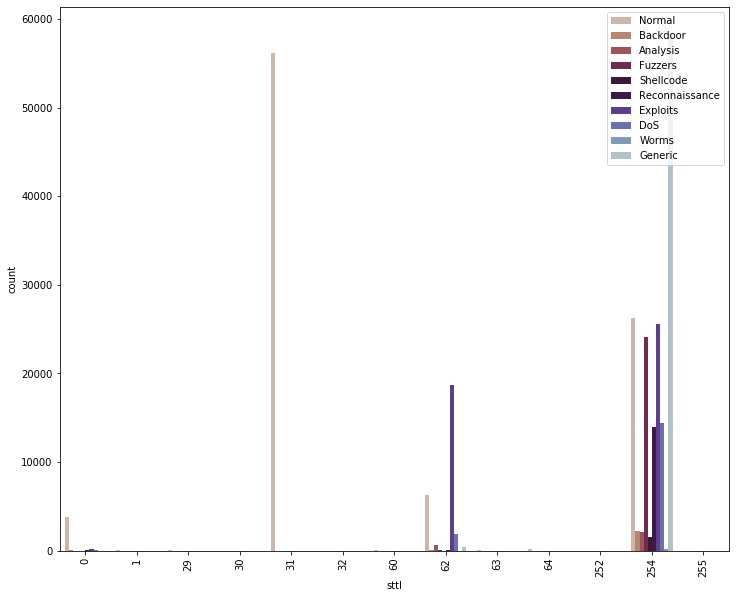

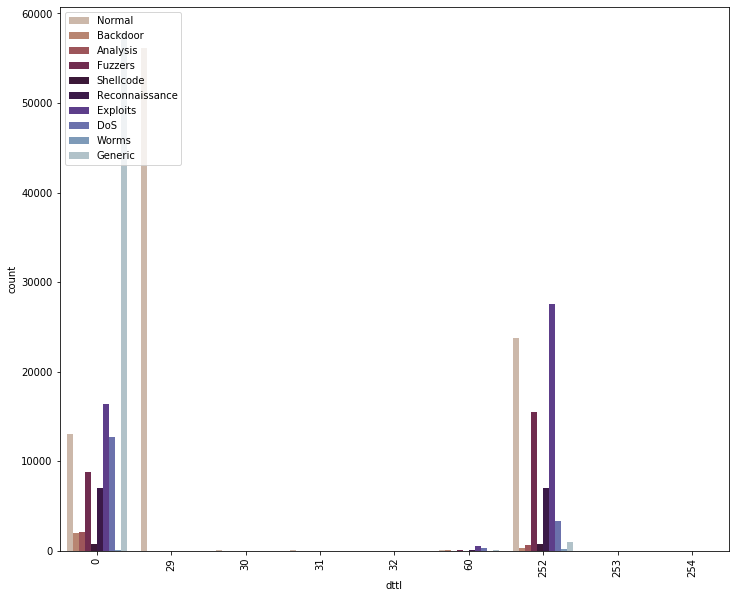

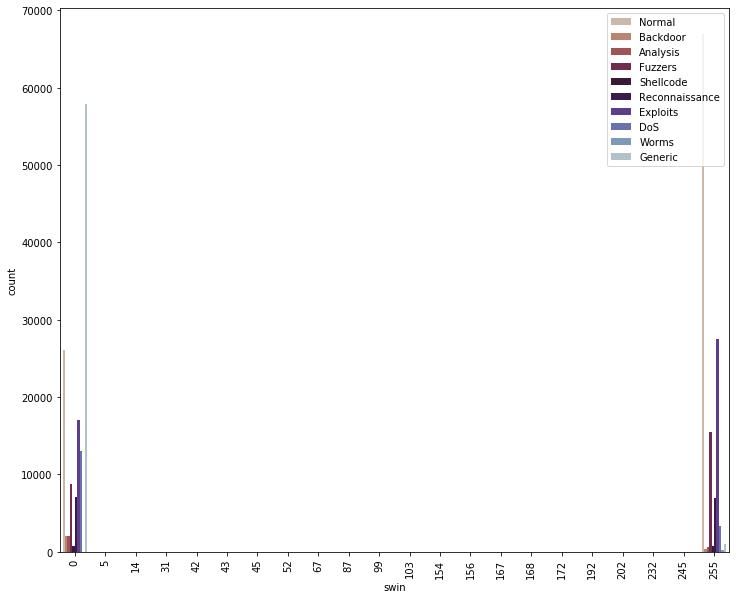

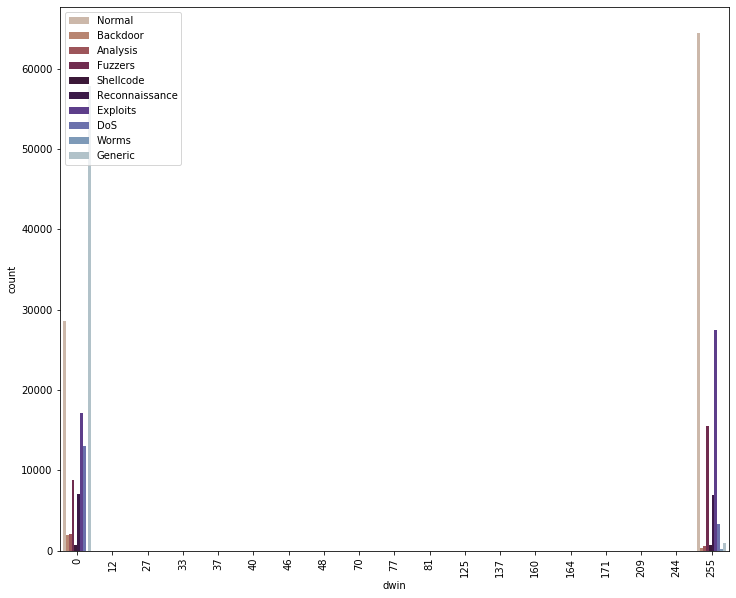

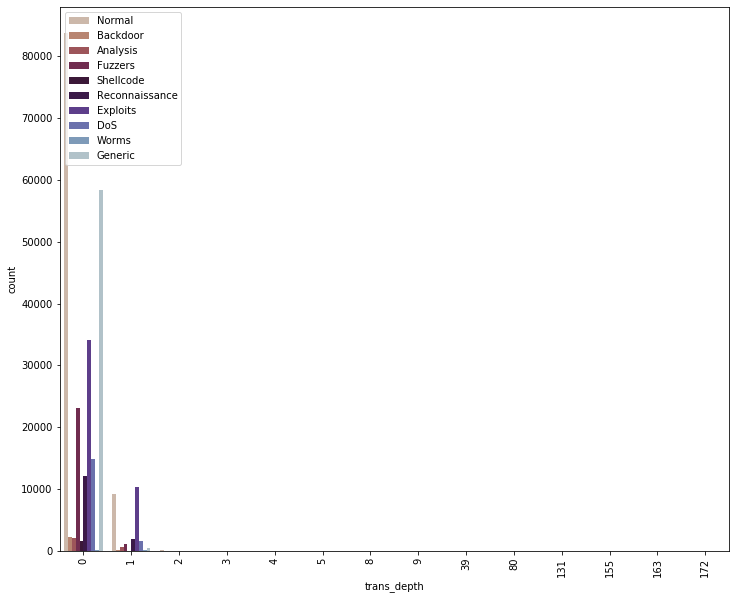

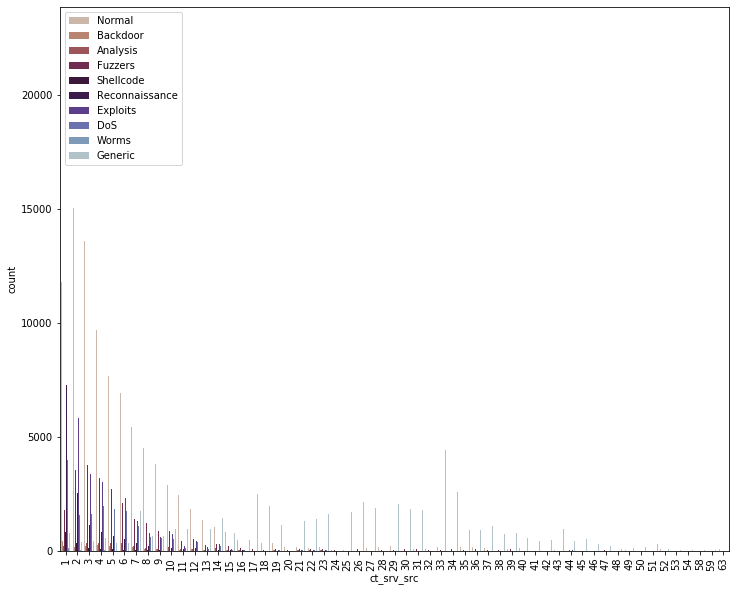

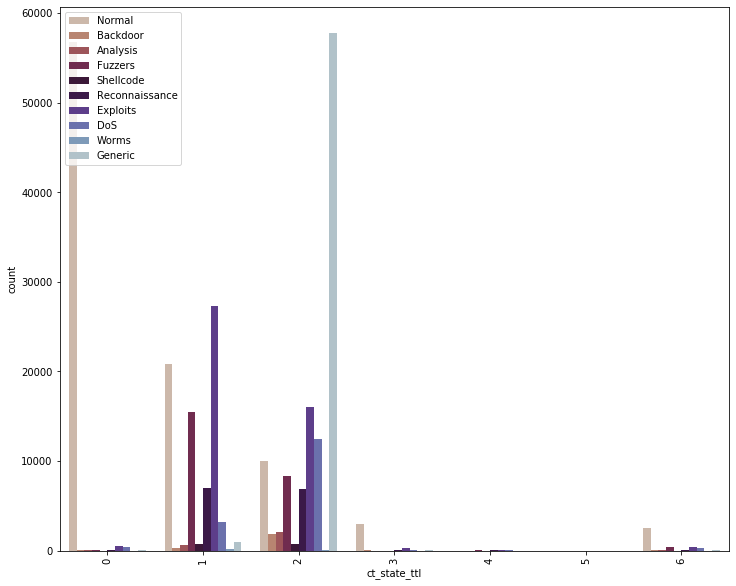

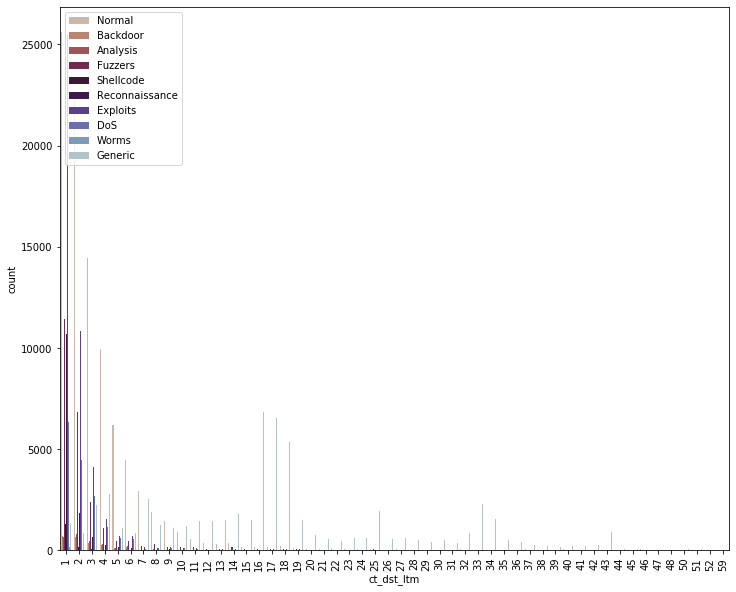

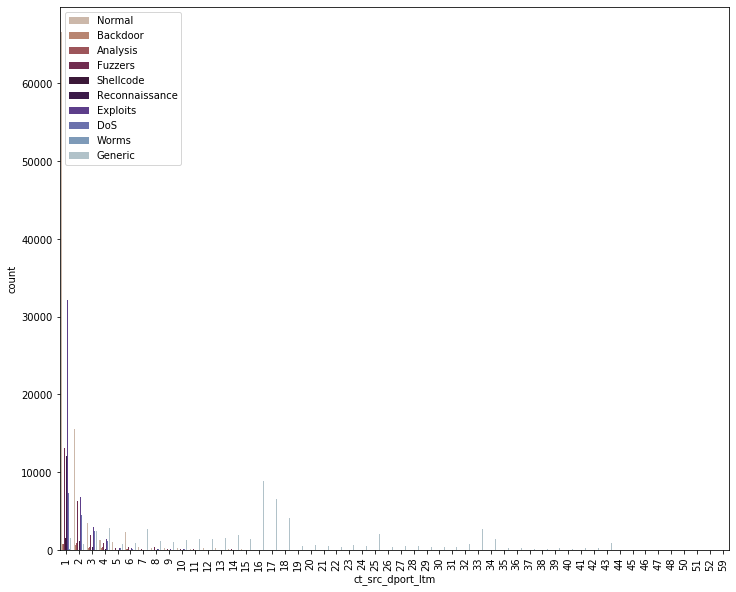

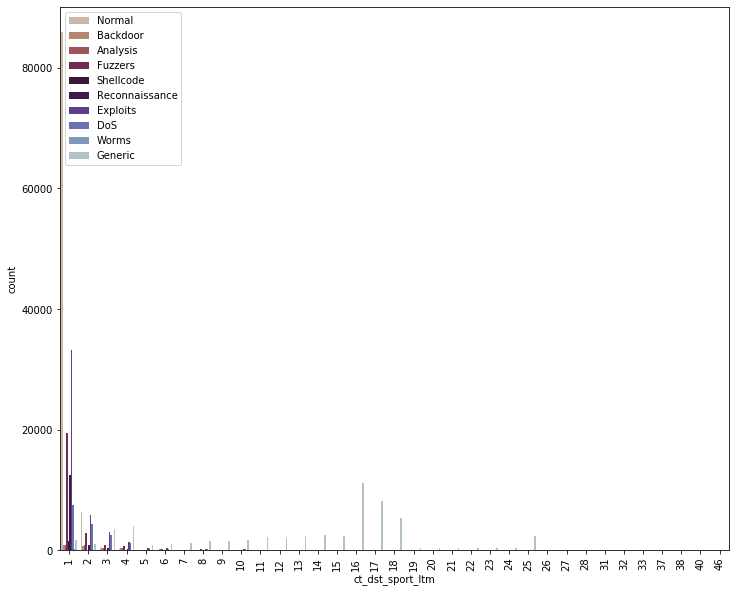

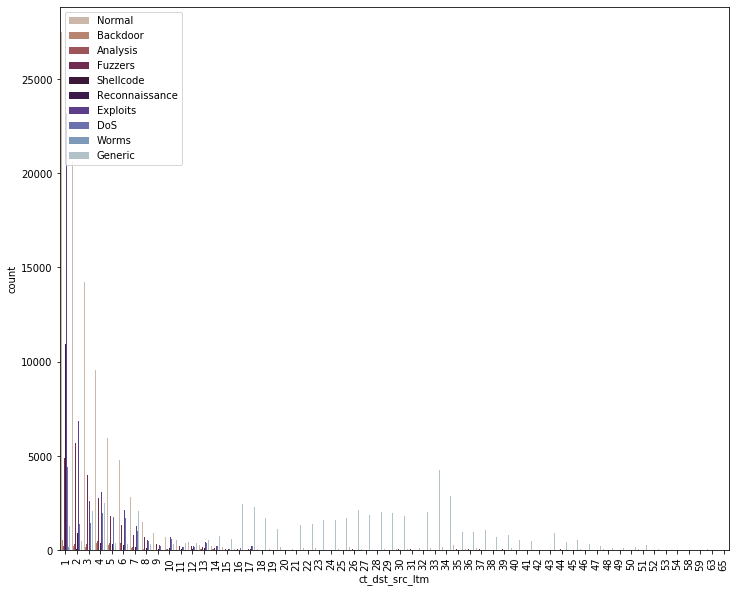

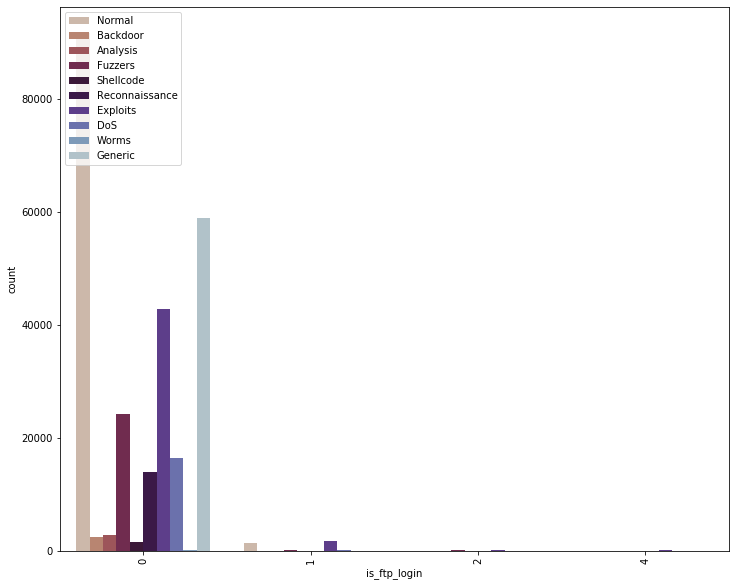

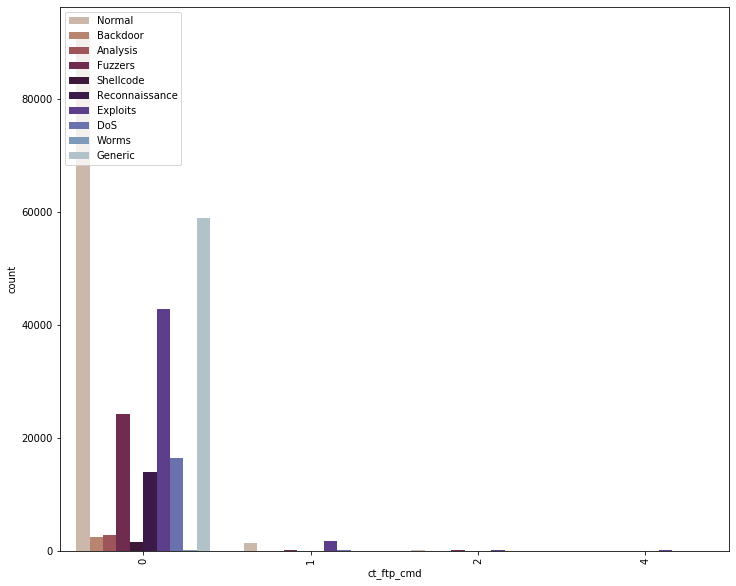

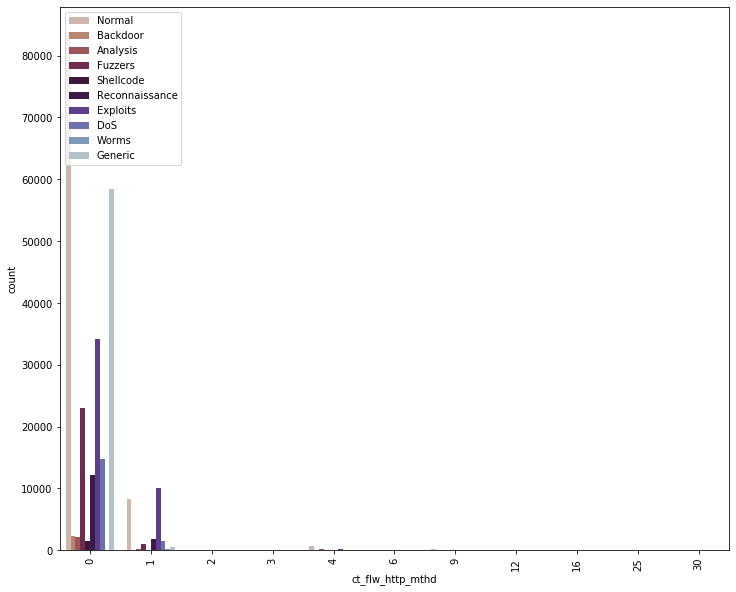

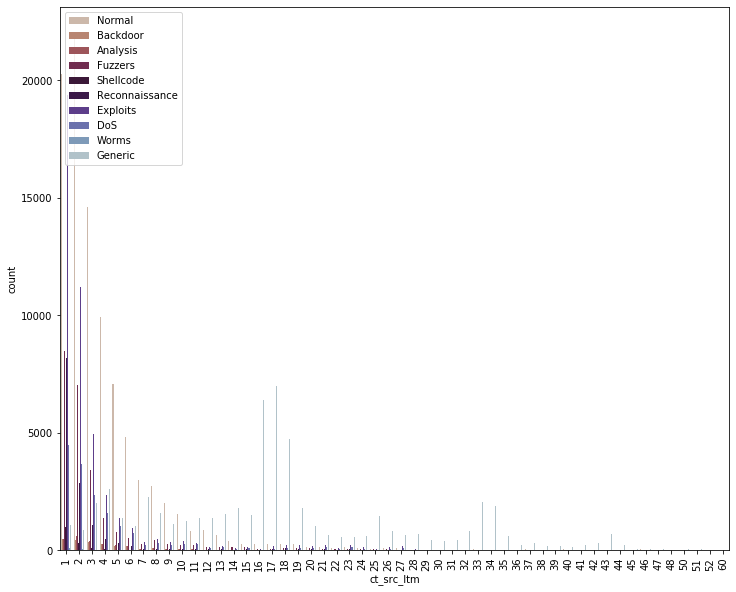

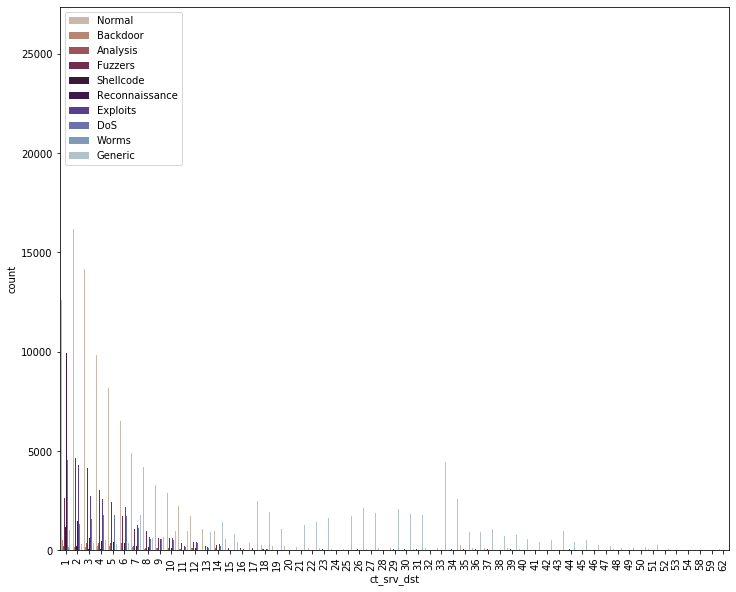

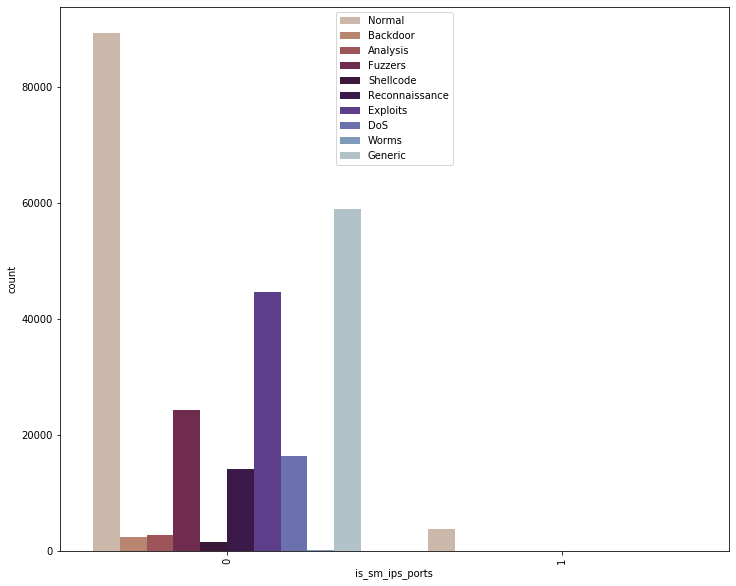

In [27]:
for i in categorical:
    plt.figure(figsize=(12,10))
    sns.countplot(df[i],hue=df.attack_cat, palette='twilight_r')
    plt.xticks(rotation=90)
    plt.legend()
    plt.show()

Interpretation for bivariate analysis :-
    
1.  It is observed that Gereric attack is quite predominent in most of the categorical columns.
2.  In trans_depth column, it has been observed that if the observation is 0 and 1, then probability of attack is high. 
3.  In dwin column, attacks are occuring only when the observation is found to be either 0 or 255.
4. In Swin Column, attacks are occuring only when the observation is found to be either 0 or 255.
5. Attacks are quite prevalent in the observation is found to be either 0 or 252 for ddtl.


In [21]:
cat = pd.crosstab(df['state'],df.attack_cat)
cat.sum(1)

state
ACC         4
CLO         1
CON     20134
ECO        12
FIN    117164
INT    116438
PAR         1
REQ      3833
RST        84
URN         1
no          1
dtype: int64

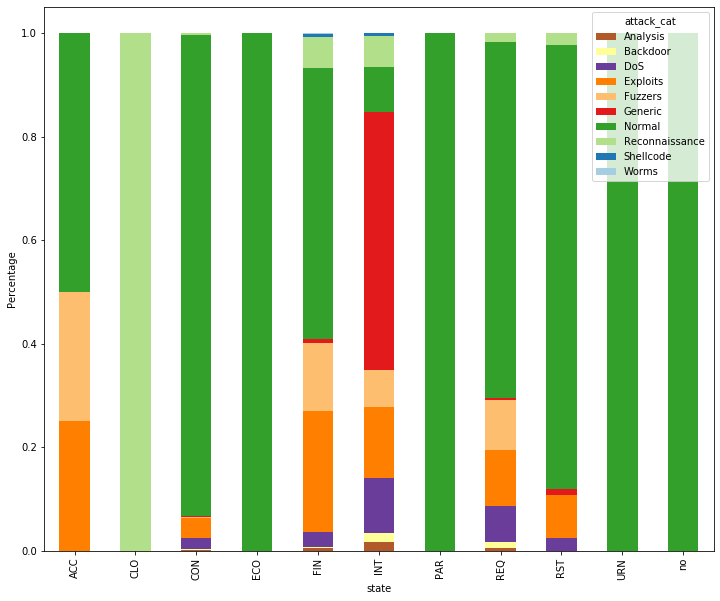

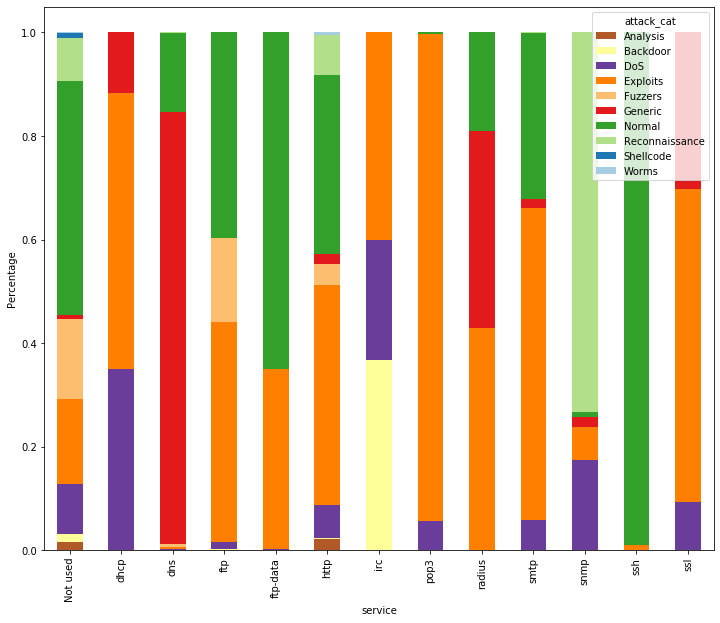

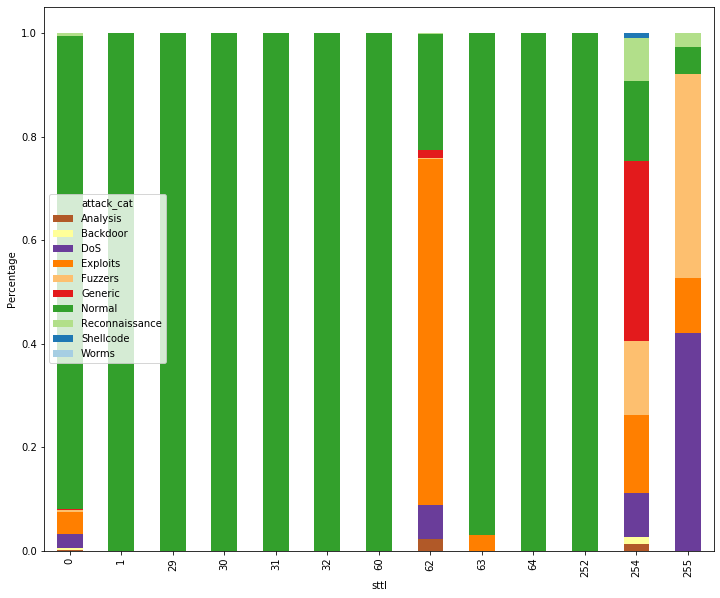

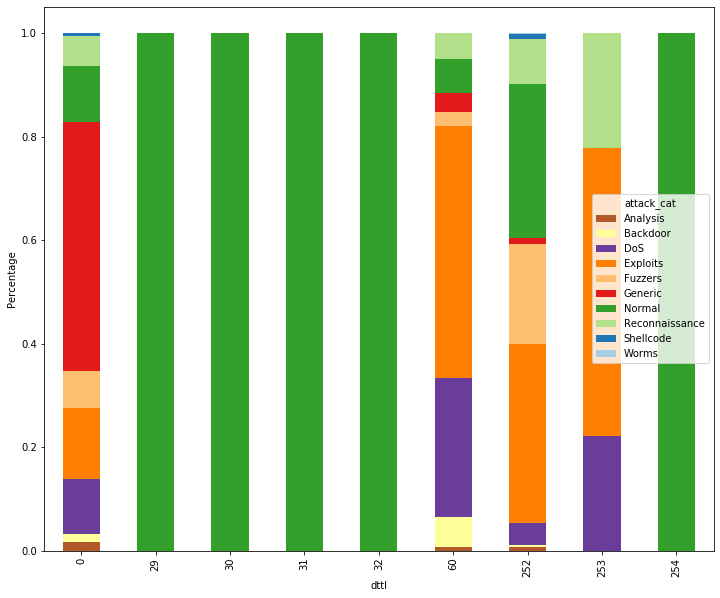

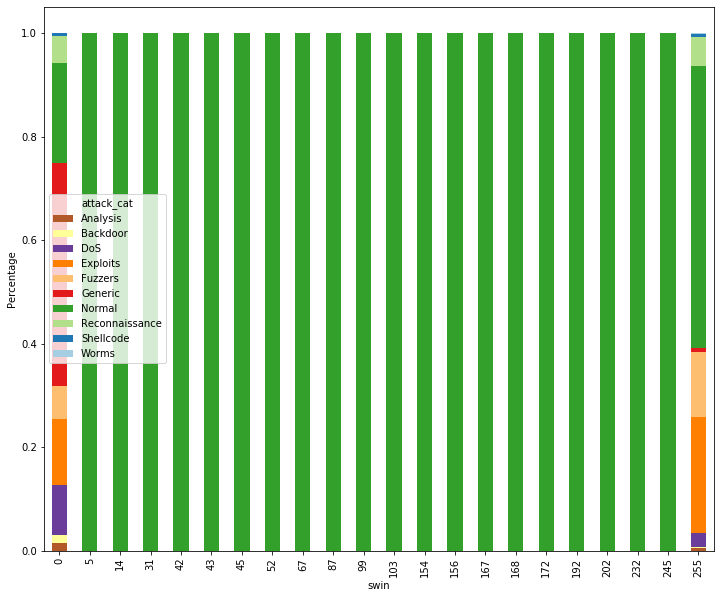

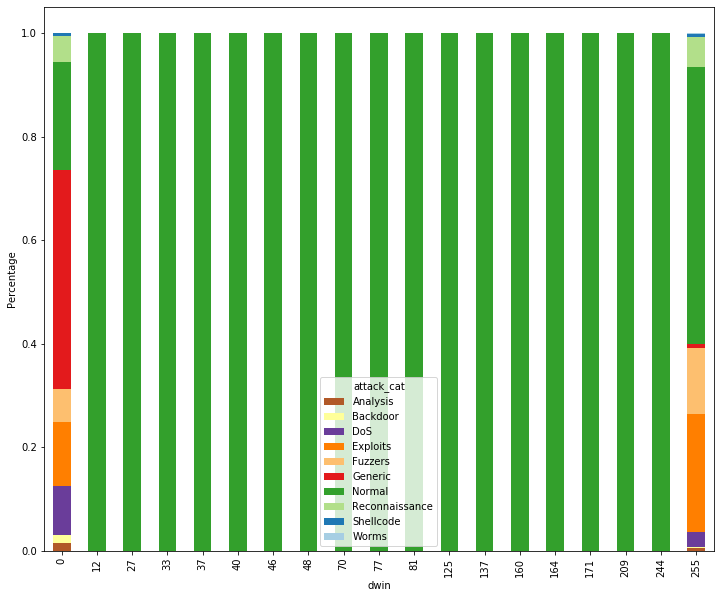

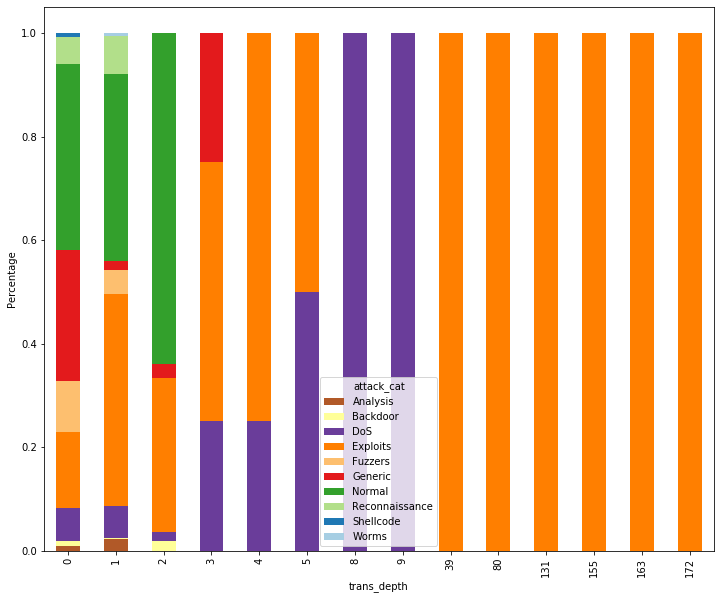

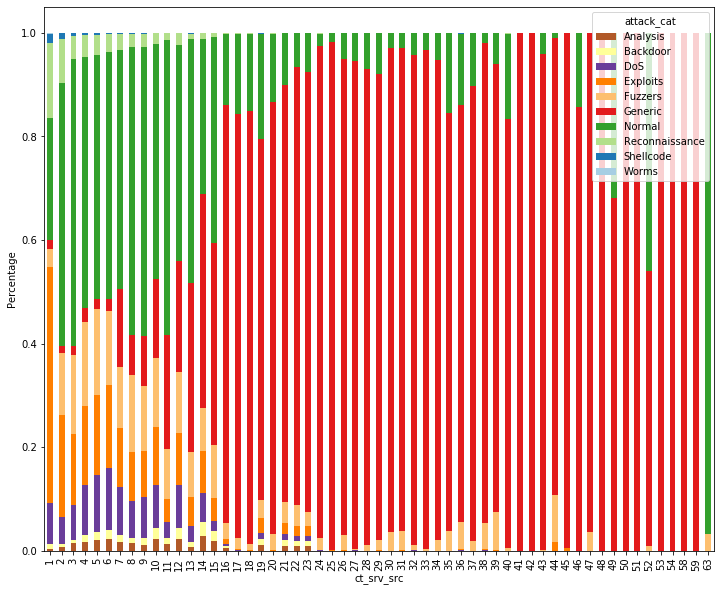

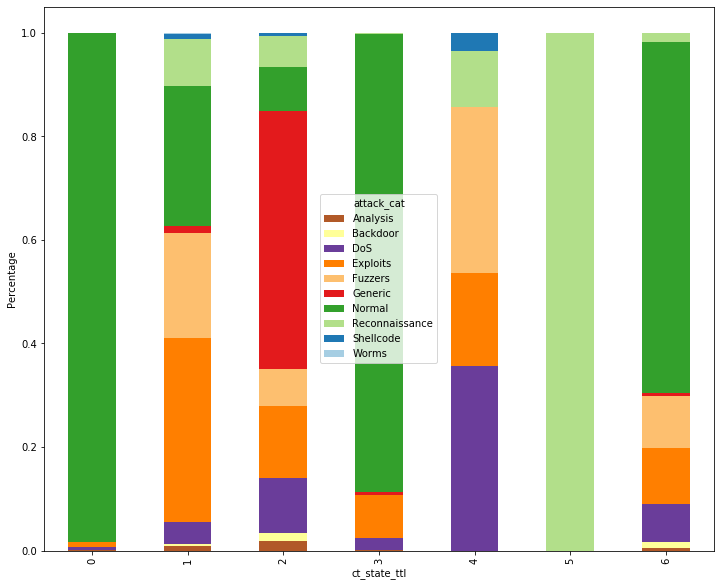

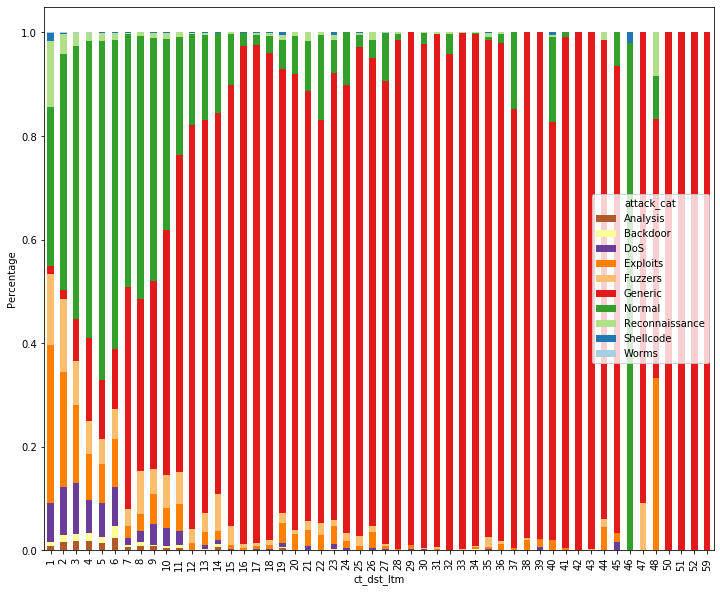

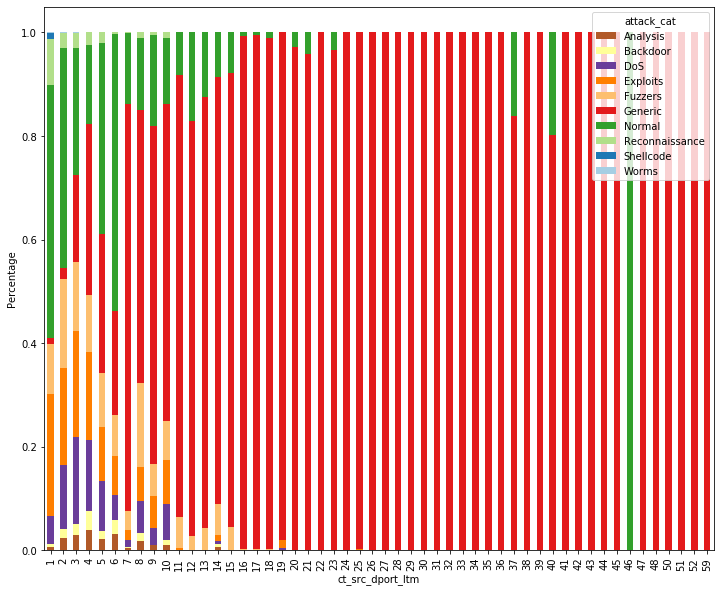

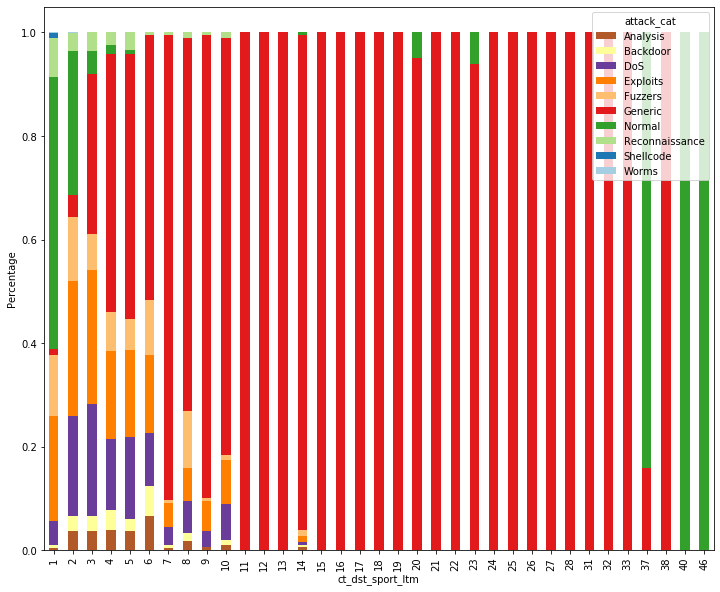

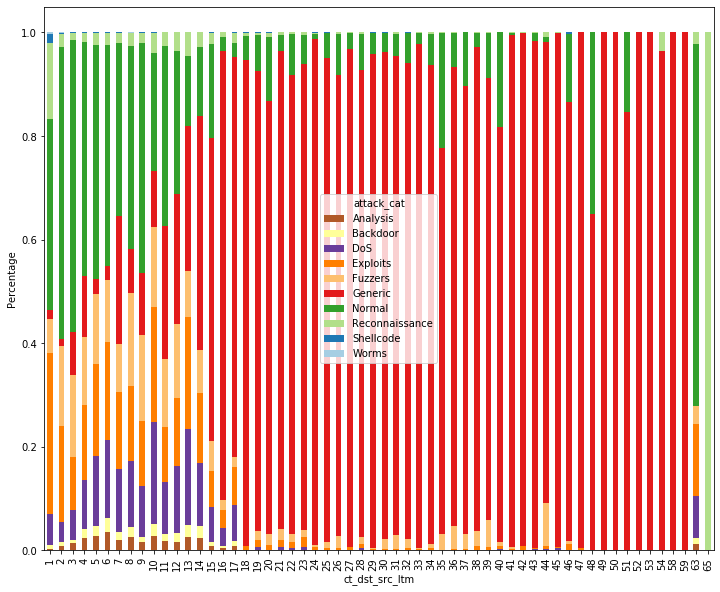

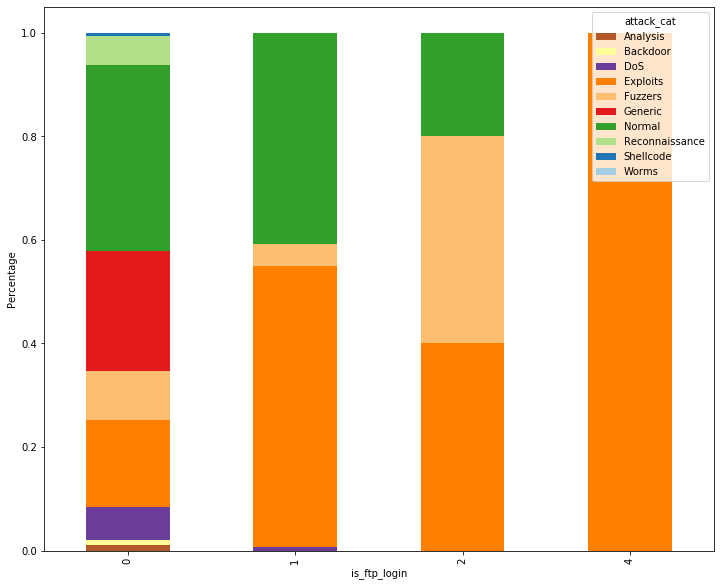

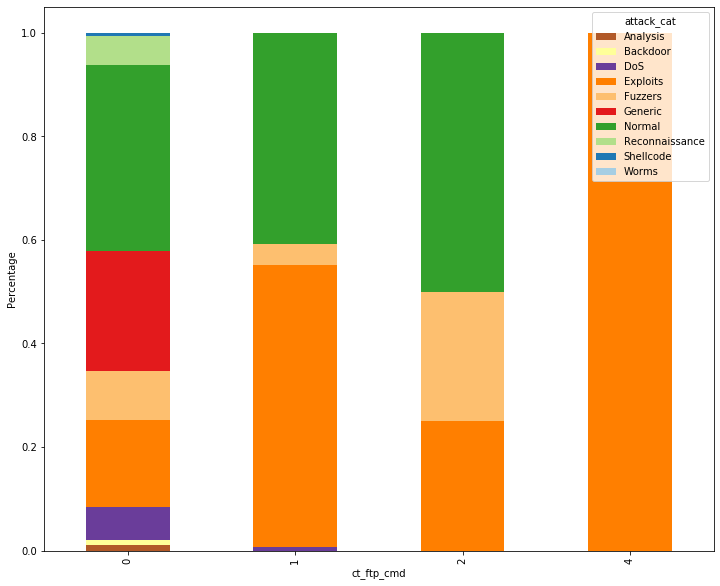

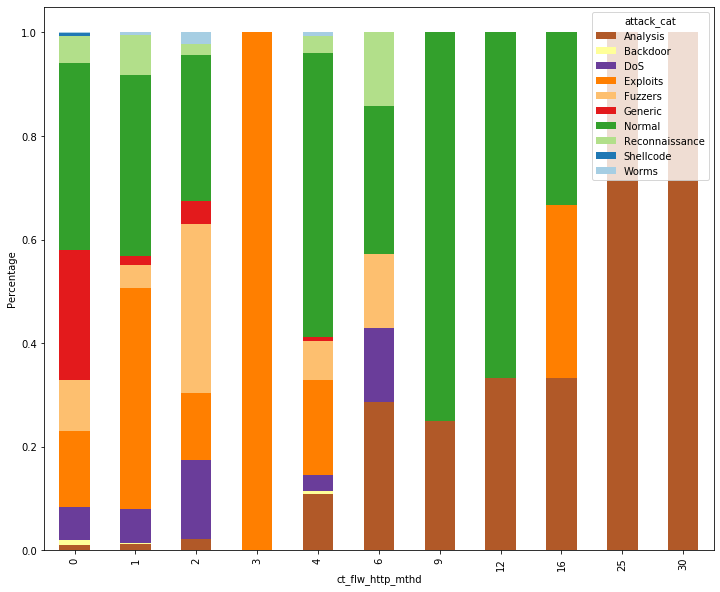

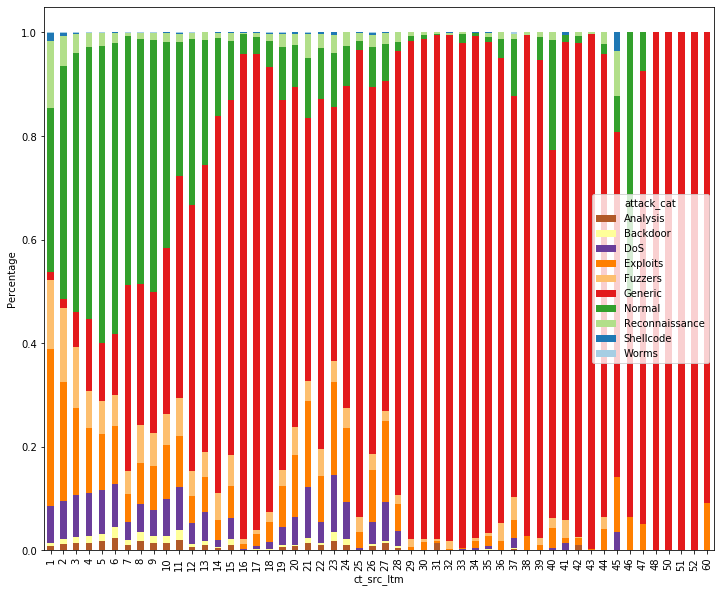

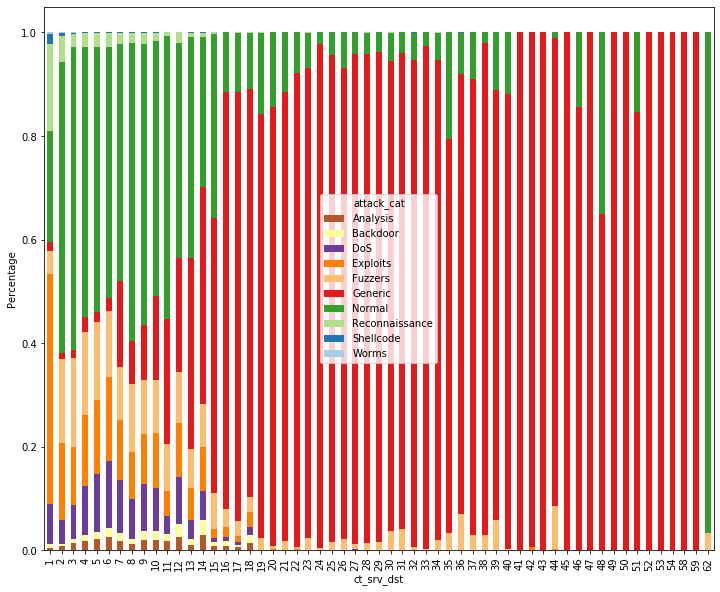

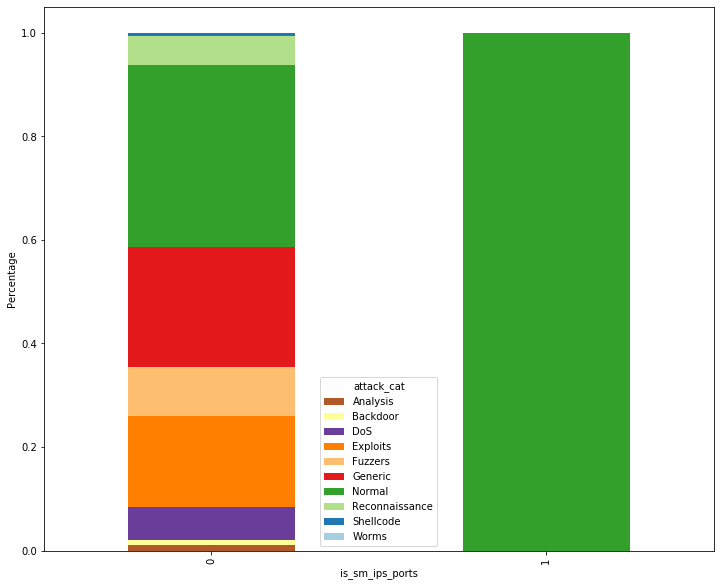

In [91]:
##STACKED BAR GRAPH

for i in categorical:
    cat = pd.crosstab(df[i],df.attack_cat)
    cat.div(cat.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, colormap='Paired_r', figsize = (12,10))
    plt.xlabel(i)
    plt.ylabel('Percentage')
    plt.xticks(rotation = 90)
    plt.show()


In [79]:
## Insights:

### Extra insights

- In  DoS attacks for sload<300 , state = 'int'. 
- For proto --> ospf , sttl ==1 , then attacks are normal

In [28]:
# ospf , sttl=1 then normal
# ospf , sttl=254 then attack

df.groupby([df[df['proto'] == 'ospf']['proto'],'sttl'])['label'].value_counts()


proto  sttl  label
ospf   1     0         102
       254   1        3169
Name: label, dtype: int64

In [29]:
df.groupby([df[df['proto'] == 'ospf']['proto'],'sttl'])['attack_cat'].value_counts()


proto  sttl  attack_cat    
ospf   1     Normal             102
       254   Exploits          1504
             DoS                944
             Reconnaissance     229
             Fuzzers            210
             Backdoor           162
             Analysis            75
             Generic             45
Name: attack_cat, dtype: int64

In [30]:
# udp , no service, 'Worm' attack
# tcp , service=http, 'Worm' attack

df.groupby([df[df['attack_cat'] == 'Worms']['attack_cat'],df[df['service'] == 'http']['service']])['proto'].value_counts()



attack_cat  service  proto
Worms       http     tcp      148
Name: proto, dtype: int64

In [42]:
df.groupby([df[df['attack_cat'] == 'Worms']['attack_cat'],df[df['service'] == '-']['service']])['proto'].value_counts()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 1

In [32]:
# There is no data loss in ospf 

df.groupby([df[df['proto'] == 'ospf']['proto']])['dloss'].value_counts()


proto  dloss
ospf   0        3271
Name: dloss, dtype: int64

In [33]:
df.groupby([df[df['proto'] == 'ospf']['proto']])['sloss'].value_counts()


proto  sloss
ospf   0        3271
Name: sloss, dtype: int64

- OSPF = open shortest path first, helps determine the most efficient path to the next hop in a network that is why there is no data loss. 


In [34]:
df.groupby([df[df['proto'] == 'ospf']['proto'],df[df['dloss'] == 0]['dloss']])['attack_cat'].value_counts()


proto  dloss  attack_cat    
ospf   0.0    Exploits          1504
              DoS                944
              Reconnaissance     229
              Fuzzers            210
              Backdoor           162
              Normal             102
              Analysis            75
              Generic             45
Name: attack_cat, dtype: int64

There are no worm attacks where protocol is ospf because Worms are malware that replicate themselves and spread to other computers by using the network to spread the attack but as ospf folows the most efficient shortest path , it is very difficult to replicate the malware in network. 


In [35]:
# if dttl = 29,31, sttl=31,29   all 'Normal' attacks
# if dttl = 254  all 'Normal' attacks


df.groupby([df[(df['dttl'] == 29) | (df['dttl'] == 31) | (df['dttl'] == 254)]['dttl']])['label'].value_counts()


dttl   label
29.0   0        56123
31.0   0           38
254.0  0            2
Name: label, dtype: int64

- 

In [36]:
# whenever dns service is used with TCP protocol, no transaction is normal

df.groupby([df[df['proto'] == 'tcp']['proto'],df[df['service'] == 'dns']['service']])['label'].value_counts()

proto  service  label
tcp    dns      1        60
Name: label, dtype: int64

In [37]:
df.groupby([df[df['proto'] == 'tcp']['proto'],df[df['service'] == 'dns']['service']])['attack_cat'].value_counts()

proto  service  attack_cat    
tcp    dns      DoS               31
                Reconnaissance    20
                Exploits           7
                Generic            2
Name: attack_cat, dtype: int64

- DNS is an application layer protocol. All application layer protocols use one of the two transport layer protocols, UDP and TCP.  TCP is slow as it requires 3-way handshake. As tcp is slow, there are more chances to be attacked.




- When service is ftp or ftp data, protocol is tcp. 
- When service is ftp or ftp data, then state is only fin and con
- When service is ftp or ftp data, swin and dwin are only 255. 
- When service is ftp or ftp data , trans_depth is only 0. 
- When service is ftp or ftp data , response bod length is 0. 
- When service is ftp or ftp data, ct_flw_http_mthd is 0. 
- When service is ftp or ftp data, is_sm_ips_ports is 0. 
- When service is ftp or ftp data, these attacks are not there - worms, analysis,Reconnaissance, shellcode

When an FTP client requests to connect to an FTP server, a TCP connection is being established using the application layer within TCP and ports 20 and 21. FTP uses and relies on TCP to ensure all the packets of data are sent correctly and to the proper destination.


In [38]:

# When both is_ftp_login and  ct_ftp_cmd  is 1 for all 'Normal','Fuzzers','Exploits','DoS' attack
df.groupby([df[df['is_ftp_login'] == 1]['is_ftp_login']])['attack_cat'].value_counts()

is_ftp_login  attack_cat
1.0           Exploits      1748
              Normal        1314
              Fuzzers        134
              DoS             23
Name: attack_cat, dtype: int64

- 

In [39]:
df.is_ftp_login.value_counts()

0    254428
1      3219
4        16
2        10
Name: is_ftp_login, dtype: int64

In [40]:
df.ct_ftp_cmd.value_counts()

0    254426
1      3215
4        16
2        16
Name: ct_ftp_cmd, dtype: int64

We can drop one column, as these 2 have almost similiar value.  --> Ask sir to confirm